<a href="https://colab.research.google.com/github/bhuvaneswarignanasekar/Experiment-on-MLP/blob/main/DLassign_Question_1%262.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
# importing modules
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
from tabulate import tabulate

# Question 1
(1) Implement feedforward neural networks, i.e., multilayer perceptrons, for class 
identification  in  the  CIFAR10  and  CIFAR100  datasets,  which  can  be  loaded  as 
follows: 

#model

In [ ]:
def dataset(data):
  if data==1:
    (x_train, y_train), (x_test, y_test) =tf.keras.datasets.cifar10.load_data() 
    y_train = y_train.flatten()
    y_test = y_test.flatten()
    y_train=tf.one_hot(y_train,10, on_value=None, off_value=None, axis=None, dtype=None, name=None)
    y_test=tf.one_hot(
        y_test,10, on_value=None, off_value=None, axis=None, dtype=None, name=None)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
      
    # normalize image pixel values by dividing 
    # by 255
    gray_scale = 255
    x_train /= gray_scale
    x_test /= gray_scale
  else:
    (x_train, y_train), (x_test, y_test) =tf.keras.datasets.cifar100.load_data(label_mode="fine") 
    y_train = y_train.flatten()
    y_test = y_test.flatten()
    y_train=tf.one_hot( y_train,100, on_value=None, off_value=None, axis=None, dtype=None, name=None)
    y_test=tf.one_hot(
        y_test,100, on_value=None, off_value=None, axis=None, dtype=None, name=None)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
      
    # normalize image pixel values by dividing 
    # by 255
    gray_scale = 255
    x_train /= gray_scale
    x_test /= gray_scale
  return x_train,y_train,x_test, y_test
def model_temp(label_dim):
  model = Sequential([
    
    # reshape 28 row * 28 column data to 28*28 rows
    Flatten(input_shape=(32, 32, 3)),
    
      # dense layer 1
    Dense(256, activation='relu'),  
    Dropout(0.2),
    # dense layer 2
    Dense(128, activation='relu'), 
    Dropout(0.2),
      # output layer
    Dense(label_dim, activation='softmax'),  
])
  return model
def model_compile(model):
  model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model
def train(model):
  model.fit(x_train, y_train, epochs=10, 
          batch_size=2000, 
          validation_split=0.2)
  return model
def test_pred(model):
  results = model.evaluate(x_test,  y_test, verbose = 0)
  return results

CIFAR 10


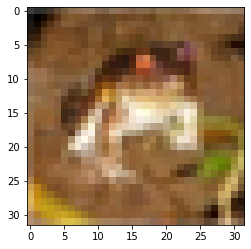

In [ ]:
x_train,y_train,x_test, y_test=dataset(1)
fig, ax = plt.subplots(1,1)

ax.imshow(x_train[0])
plt.show()

In [ ]:
model=model_temp(10)
model=model_compile(model)
model=train(model)
results=test_pred(model)

Epoch 1/10
20/20 [==============================] - 4s 177ms/step - loss: 2.4493 - accuracy: 0.1429 - val_loss: 2.1222 - val_accuracy: 0.2360
Epoch 2/10
20/20 [==============================] - 3s 161ms/step - loss: 2.0934 - accuracy: 0.2306 - val_loss: 1.9853 - val_accuracy: 0.2982
Epoch 3/10
20/20 [==============================] - 3s 162ms/step - loss: 1.9862 - accuracy: 0.2764 - val_loss: 1.9035 - val_accuracy: 0.3253
Epoch 4/10
20/20 [==============================] - 3s 163ms/step - loss: 1.9156 - accuracy: 0.3095 - val_loss: 1.8499 - val_accuracy: 0.3450
Epoch 5/10
20/20 [==============================] - 3s 163ms/step - loss: 1.8673 - accuracy: 0.3274 - val_loss: 1.8131 - val_accuracy: 0.3579
Epoch 6/10
20/20 [==============================] - 3s 163ms/step - loss: 1.8391 - accuracy: 0.3357 - val_loss: 1.7844 - val_accuracy: 0.3651
Epoch 7/10
20/20 [==============================] - 3s 162ms/step - loss: 1.8110 - accuracy: 0.3474 - val_loss: 1.7717 - val_accuracy: 0.3673
Epoch 

In [ ]:
print('test loss, test acc:', results)

test loss, test acc: [1.6693216562271118, 0.4075999855995178]


CIFAR 100

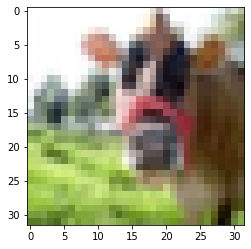

Epoch 1/10
20/20 [==============================] - 6s 276ms/step - loss: 4.6246 - accuracy: 0.0129 - val_loss: 4.5360 - val_accuracy: 0.0249
Epoch 2/10
20/20 [==============================] - 4s 220ms/step - loss: 4.4693 - accuracy: 0.0296 - val_loss: 4.3375 - val_accuracy: 0.0468
Epoch 3/10
20/20 [==============================] - 3s 167ms/step - loss: 4.3022 - accuracy: 0.0458 - val_loss: 4.1726 - val_accuracy: 0.0653
Epoch 4/10
20/20 [==============================] - 3s 165ms/step - loss: 4.1909 - accuracy: 0.0562 - val_loss: 4.0585 - val_accuracy: 0.0834
Epoch 5/10
20/20 [==============================] - 3s 164ms/step - loss: 4.1019 - accuracy: 0.0686 - val_loss: 3.9691 - val_accuracy: 0.0996
Epoch 6/10
20/20 [==============================] - 3s 165ms/step - loss: 4.0294 - accuracy: 0.0795 - val_loss: 3.8964 - val_accuracy: 0.1081
Epoch 7/10
20/20 [==============================] - 3s 165ms/step - loss: 3.9617 - accuracy: 0.0903 - val_loss: 3.8363 - val_accuracy: 0.1191
Epoch 

In [ ]:
x_train,y_train,x_test, y_test=dataset(2)
fig, ax = plt.subplots(1,1)

ax.imshow(x_train[0])
plt.show()
model=model_temp(100)
model=model_compile(model)
model=train(model)
results=test_pred(model)
print('test loss, test acc:', results)

#Question 2
(2) Evaluate the performance of MLPs with (i) different network configurations: 
number of layers (e.g., 2, 3, 4, 5, ...) and number of hidden nodes (e.g., 64, 256, 
512,  ...);  (ii)  with  or  without  regularization  (i.e.,  with  or  without  dropout  (e.g., 
dropout rate = 0.2, 0.4, 0.6)); (iii) different optimizers (e.g., SGD, Adam, etc.).  

# no regularization

# hidden layer 2

In [ ]:
def dataset(data):
  if data==1:
    (x_train, y_train), (x_test, y_test) =tf.keras.datasets.cifar10.load_data() 
    y_train = y_train.flatten()
    y_test = y_test.flatten()
    y_train=tf.one_hot(y_train,10, on_value=None, off_value=None, axis=None, dtype=None, name=None)
    y_test=tf.one_hot(
        y_test,10, on_value=None, off_value=None, axis=None, dtype=None, name=None)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
      
    # normalize image pixel values by dividing 
    # by 255
    gray_scale = 255
    x_train /= gray_scale
    x_test /= gray_scale
  else:
    (x_train, y_train), (x_test, y_test) =tf.keras.datasets.cifar100.load_data(label_mode="fine") 
    y_train = y_train.flatten()
    y_test = y_test.flatten()
    y_train=tf.one_hot( y_train,100, on_value=None, off_value=None, axis=None, dtype=None, name=None)
    y_test=tf.one_hot(
        y_test,100, on_value=None, off_value=None, axis=None, dtype=None, name=None)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
      
    # normalize image pixel values by dividing 
    # by 255
    gray_scale = 255
    x_train /= gray_scale
    x_test /= gray_scale
  return x_train,y_train,x_test, y_test
def model_temp(label_dim,hidden_node):
  model = Sequential([
    
    # reshape 28 row * 28 column data to 28*28 rows
    Flatten(input_shape=(32, 32, 3)),
    
      # dense layer 1
    Dense(hidden_node, activation='relu'),  
    
    # dense layer 2
    Dense(hidden_node, activation='relu'), 
    
      # output layer
    Dense(label_dim, activation='softmax'),  
])
  return model
def model_compile(model,opt):
  model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model
def train(model):
  model.fit(x_train, y_train, epochs=10, 
          batch_size=2000, 
          validation_split=0.2)
  return model
def test_pred(model):
  results = model.evaluate(x_test,  y_test, verbose = 0)
  return results

Adam

CIFAR 10


In [ ]:
hidden_nodes=[64,256,512]

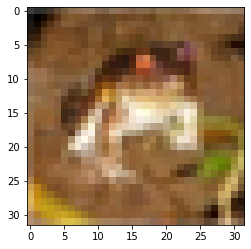

Epoch 1/10
20/20 [==============================] - 2s 77ms/step - loss: 2.1666 - accuracy: 0.2022 - val_loss: 2.0211 - val_accuracy: 0.2770
Epoch 2/10
20/20 [==============================] - 1s 65ms/step - loss: 1.9516 - accuracy: 0.3041 - val_loss: 1.9212 - val_accuracy: 0.3114
Epoch 3/10
20/20 [==============================] - 1s 66ms/step - loss: 1.8782 - accuracy: 0.3317 - val_loss: 1.8710 - val_accuracy: 0.3442
Epoch 4/10
20/20 [==============================] - 1s 66ms/step - loss: 1.8321 - accuracy: 0.3554 - val_loss: 1.8270 - val_accuracy: 0.3544
Epoch 5/10
20/20 [==============================] - 1s 65ms/step - loss: 1.7955 - accuracy: 0.3681 - val_loss: 1.8067 - val_accuracy: 0.3634
Epoch 6/10
20/20 [==============================] - 1s 66ms/step - loss: 1.7701 - accuracy: 0.3787 - val_loss: 1.7929 - val_accuracy: 0.3687
Epoch 7/10
20/20 [==============================] - 1s 65ms/step - loss: 1.7423 - accuracy: 0.3870 - val_loss: 1.7520 - val_accuracy: 0.3801
Epoch 8/10
20

In [ ]:
x_train,y_train,x_test, y_test=dataset(1)
fig, ax = plt.subplots(1,1)

ax.imshow(x_train[0])
plt.show()
res=[]
 
# create header
head = ["hidden node","test loss","test accuracy"]
 
for hidden_node in hidden_nodes:
  model=model_temp(10,hidden_node)
  model=model_compile(model,'Adam')
  model=train(model)
  result=test_pred(model)
  res.append([2,hidden_node,result[0],result[1]])
# display table
print(tabulate(res, headers=head, tablefmt="grid"))

In [ ]:
print(tabulate(res, headers=head, tablefmt="grid"))

+----+---------------+-------------+-----------------+
|    |   hidden node |   test loss |   test accuracy |
+====+===============+=============+=================+
|  2 |            64 |     1.68807 |          0.4049 |
+----+---------------+-------------+-----------------+
|  2 |           256 |     1.5879  |          0.4426 |
+----+---------------+-------------+-----------------+
|  2 |           512 |     1.60402 |          0.4329 |
+----+---------------+-------------+-----------------+


CIFAR 100

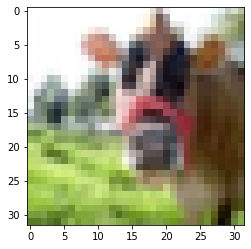

Epoch 1/10
20/20 [==============================] - 2s 85ms/step - loss: 4.5986 - accuracy: 0.0160 - val_loss: 4.5546 - val_accuracy: 0.0224
Epoch 2/10
20/20 [==============================] - 1s 71ms/step - loss: 4.4771 - accuracy: 0.0233 - val_loss: 4.3947 - val_accuracy: 0.0343
Epoch 3/10
20/20 [==============================] - 1s 71ms/step - loss: 4.2907 - accuracy: 0.0441 - val_loss: 4.2108 - val_accuracy: 0.0521
Epoch 4/10
20/20 [==============================] - 1s 72ms/step - loss: 4.1369 - accuracy: 0.0649 - val_loss: 4.0973 - val_accuracy: 0.0764
Epoch 5/10
20/20 [==============================] - 1s 72ms/step - loss: 4.0430 - accuracy: 0.0807 - val_loss: 4.0242 - val_accuracy: 0.0862
Epoch 6/10
20/20 [==============================] - 1s 72ms/step - loss: 3.9812 - accuracy: 0.0899 - val_loss: 3.9853 - val_accuracy: 0.0908
Epoch 7/10
20/20 [==============================] - 1s 72ms/step - loss: 3.9355 - accuracy: 0.0959 - val_loss: 3.9418 - val_accuracy: 0.0996
Epoch 8/10
20

In [ ]:
x_train,y_train,x_test, y_test=dataset(2)
fig, ax = plt.subplots(1,1)

ax.imshow(x_train[0])
plt.show()
res=[]
 
# create header
head = ["hidden node","test loss","test accuracy"]
 
for hidden_node in hidden_nodes:
  model=model_temp(100,hidden_node)
  model=model_compile(model,'Adam')
  model=train(model)
  result=test_pred(model)
  res.append([2,hidden_node,result[0],result[1]])

In [ ]:
# display table
print(tabulate(res, headers=head, tablefmt="grid"))

+----+---------------+-------------+-----------------+
|    |   hidden node |   test loss |   test accuracy |
+====+===============+=============+=================+
|  2 |            64 |     3.84234 |          0.1135 |
+----+---------------+-------------+-----------------+
|  2 |           256 |     3.57969 |          0.1672 |
+----+---------------+-------------+-----------------+
|  2 |           512 |     3.43612 |          0.1959 |
+----+---------------+-------------+-----------------+


 SGD as optimizer

 CIFAR 10

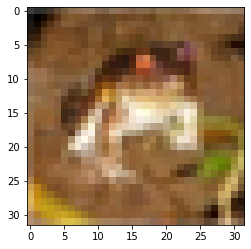

Epoch 1/10
20/20 [==============================] - 2s 78ms/step - loss: 2.2812 - accuracy: 0.1497 - val_loss: 2.2455 - val_accuracy: 0.1744
Epoch 2/10
20/20 [==============================] - 1s 64ms/step - loss: 2.2223 - accuracy: 0.1907 - val_loss: 2.1978 - val_accuracy: 0.2005
Epoch 3/10
20/20 [==============================] - 1s 64ms/step - loss: 2.1759 - accuracy: 0.2175 - val_loss: 2.1539 - val_accuracy: 0.2225
Epoch 4/10
20/20 [==============================] - 1s 66ms/step - loss: 2.1371 - accuracy: 0.2315 - val_loss: 2.1191 - val_accuracy: 0.2329
Epoch 5/10
20/20 [==============================] - 1s 64ms/step - loss: 2.1046 - accuracy: 0.2451 - val_loss: 2.0893 - val_accuracy: 0.2422
Epoch 6/10
20/20 [==============================] - 1s 64ms/step - loss: 2.0761 - accuracy: 0.2543 - val_loss: 2.0644 - val_accuracy: 0.2581
Epoch 7/10
20/20 [==============================] - 1s 64ms/step - loss: 2.0519 - accuracy: 0.2634 - val_loss: 2.0425 - val_accuracy: 0.2668
Epoch 8/10
20

In [ ]:
x_train,y_train,x_test, y_test=dataset(1)
fig, ax = plt.subplots(1,1)

ax.imshow(x_train[0])
plt.show()
res=[]
 
# create header
head = ["hidden node","test loss","test accuracy"]
 
for hidden_node in hidden_nodes:
  model=model_temp(10,hidden_node)
  model=model_compile(model,'SGD')
  model=train(model)
  result=test_pred(model)
  res.append([2,hidden_node,result[0],result[1]])

In [ ]:
# display table
print(tabulate(res, headers=head, tablefmt="grid"))

+----+---------------+-------------+-----------------+
|    |   hidden node |   test loss |   test accuracy |
+====+===============+=============+=================+
|  2 |            64 |     1.99172 |          0.2849 |
+----+---------------+-------------+-----------------+
|  2 |           256 |     1.9311  |          0.3301 |
+----+---------------+-------------+-----------------+
|  2 |           512 |     1.90242 |          0.3414 |
+----+---------------+-------------+-----------------+


 CIFAR 100

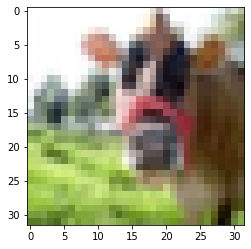

Epoch 1/10
20/20 [==============================] - 2s 81ms/step - loss: 4.6140 - accuracy: 0.0127 - val_loss: 4.6082 - val_accuracy: 0.0122
Epoch 2/10
20/20 [==============================] - 1s 71ms/step - loss: 4.6040 - accuracy: 0.0140 - val_loss: 4.6041 - val_accuracy: 0.0126
Epoch 3/10
20/20 [==============================] - 1s 69ms/step - loss: 4.6005 - accuracy: 0.0143 - val_loss: 4.6015 - val_accuracy: 0.0147
Epoch 4/10
20/20 [==============================] - 1s 68ms/step - loss: 4.5980 - accuracy: 0.0157 - val_loss: 4.5993 - val_accuracy: 0.0161
Epoch 5/10
20/20 [==============================] - 1s 69ms/step - loss: 4.5958 - accuracy: 0.0161 - val_loss: 4.5973 - val_accuracy: 0.0163
Epoch 6/10
20/20 [==============================] - 1s 67ms/step - loss: 4.5937 - accuracy: 0.0157 - val_loss: 4.5953 - val_accuracy: 0.0161
Epoch 7/10
20/20 [==============================] - 2s 105ms/step - loss: 4.5915 - accuracy: 0.0166 - val_loss: 4.5932 - val_accuracy: 0.0167
Epoch 8/10
2

In [ ]:
x_train,y_train,x_test, y_test=dataset(2)
fig, ax = plt.subplots(1,1)

ax.imshow(x_train[0])
plt.show()
res=[]
 
# create header
head = ["hidden node","test loss","test accuracy"]
 
for hidden_node in hidden_nodes:
  model=model_temp(100,hidden_node)
  model=model_compile(model,'SGD')
  model=train(model)
  result=test_pred(model)
  res.append([2,hidden_node,result[0],result[1]])

In [ ]:
# display table
print(tabulate(res, headers=head, tablefmt="grid"))

+----+---------------+-------------+-----------------+
|    |   hidden node |   test loss |   test accuracy |
+====+===============+=============+=================+
|  2 |            64 |     4.5847  |          0.0195 |
+----+---------------+-------------+-----------------+
|  2 |           256 |     4.51241 |          0.0392 |
+----+---------------+-------------+-----------------+
|  2 |           512 |     4.45995 |          0.0459 |
+----+---------------+-------------+-----------------+


#Hidden layer 3
No Regularization

In [ ]:
def dataset(data):
  if data==1:
    (x_train, y_train), (x_test, y_test) =tf.keras.datasets.cifar10.load_data() 
    y_train = y_train.flatten()
    y_test = y_test.flatten()
    y_train=tf.one_hot(y_train,10, on_value=None, off_value=None, axis=None, dtype=None, name=None)
    y_test=tf.one_hot(
        y_test,10, on_value=None, off_value=None, axis=None, dtype=None, name=None)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
      
    # normalize image pixel values by dividing 
    # by 255
    gray_scale = 255
    x_train /= gray_scale
    x_test /= gray_scale
  else:
    (x_train, y_train), (x_test, y_test) =tf.keras.datasets.cifar100.load_data(label_mode="fine") 
    y_train = y_train.flatten()
    y_test = y_test.flatten()
    y_train=tf.one_hot( y_train,100, on_value=None, off_value=None, axis=None, dtype=None, name=None)
    y_test=tf.one_hot(
        y_test,100, on_value=None, off_value=None, axis=None, dtype=None, name=None)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
      
    # normalize image pixel values by dividing 
    # by 255
    gray_scale = 255
    x_train /= gray_scale
    x_test /= gray_scale
  return x_train,y_train,x_test, y_test
def model_temp(label_dim,hidden_node):
  model = Sequential([
    
    # reshape 28 row * 28 column data to 28*28 rows
    Flatten(input_shape=(32, 32, 3)),
    
      # dense layer 1
    Dense(hidden_node, activation='relu'),  
    
    # dense layer 2
    Dense(hidden_node, activation='relu'), 
    #dense layer 3
    Dense(hidden_node, activation='relu'),
    
      # output layer
    Dense(label_dim, activation='softmax'),  
])
  return model
def model_compile(model,opt):
  model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model
def train(model):
  model.fit(x_train, y_train, epochs=10, 
          batch_size=2000, 
          validation_split=0.2)
  return model
def test_pred(model):
  results = model.evaluate(x_test,  y_test, verbose = 0)
  return results

In [ ]:
hidden_nodes=[128,256,512]

Adam

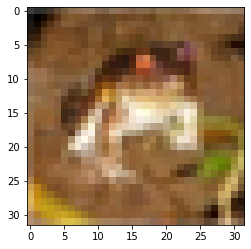

Epoch 1/10
20/20 [==============================] - 3s 116ms/step - loss: 2.1953 - accuracy: 0.1787 - val_loss: 2.0523 - val_accuracy: 0.2516
Epoch 2/10
20/20 [==============================] - 2s 103ms/step - loss: 1.9586 - accuracy: 0.2964 - val_loss: 1.9162 - val_accuracy: 0.3128
Epoch 3/10
20/20 [==============================] - 2s 103ms/step - loss: 1.8661 - accuracy: 0.3399 - val_loss: 1.8847 - val_accuracy: 0.3258
Epoch 4/10
20/20 [==============================] - 2s 104ms/step - loss: 1.8165 - accuracy: 0.3570 - val_loss: 1.8172 - val_accuracy: 0.3586
Epoch 5/10
20/20 [==============================] - 2s 103ms/step - loss: 1.7750 - accuracy: 0.3709 - val_loss: 1.7774 - val_accuracy: 0.3717
Epoch 6/10
20/20 [==============================] - 2s 103ms/step - loss: 1.7402 - accuracy: 0.3857 - val_loss: 1.7549 - val_accuracy: 0.3819
Epoch 7/10
20/20 [==============================] - 2s 103ms/step - loss: 1.7016 - accuracy: 0.4002 - val_loss: 1.7177 - val_accuracy: 0.3916
Epoch 

In [ ]:
x_train,y_train,x_test, y_test=dataset(1)
fig, ax = plt.subplots(1,1)

ax.imshow(x_train[0])
plt.show()
res=[]
 
# create header
head = ["hidden node","test loss","test accuracy"]
 
for hidden_node in hidden_nodes:
  model=model_temp(10,hidden_node)
  model=model_compile(model,'Adam')
  model=train(model)
  result=test_pred(model)
  res.append([2,hidden_node,result[0],result[1]])

In [ ]:
# display table
print(tabulate(res, headers=head, tablefmt="grid"))

+----+---------------+-------------+-----------------+
|    |   hidden node |   test loss |   test accuracy |
+====+===============+=============+=================+
|  2 |           128 |     1.62883 |          0.4236 |
+----+---------------+-------------+-----------------+
|  2 |           256 |     1.5564  |          0.4456 |
+----+---------------+-------------+-----------------+
|  2 |           512 |     1.53801 |          0.4567 |
+----+---------------+-------------+-----------------+


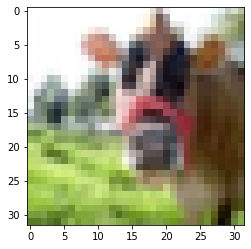

Epoch 1/10
20/20 [==============================] - 3s 121ms/step - loss: 4.5888 - accuracy: 0.0170 - val_loss: 4.5136 - val_accuracy: 0.0258
Epoch 2/10
20/20 [==============================] - 2s 109ms/step - loss: 4.3637 - accuracy: 0.0463 - val_loss: 4.2145 - val_accuracy: 0.0611
Epoch 3/10
20/20 [==============================] - 2s 108ms/step - loss: 4.1052 - accuracy: 0.0745 - val_loss: 4.0397 - val_accuracy: 0.0879
Epoch 4/10
20/20 [==============================] - 2s 108ms/step - loss: 3.9809 - accuracy: 0.0932 - val_loss: 3.9563 - val_accuracy: 0.0984
Epoch 5/10
20/20 [==============================] - 2s 108ms/step - loss: 3.8963 - accuracy: 0.1027 - val_loss: 3.8769 - val_accuracy: 0.1096
Epoch 6/10
20/20 [==============================] - 2s 107ms/step - loss: 3.8079 - accuracy: 0.1204 - val_loss: 3.8083 - val_accuracy: 0.1207
Epoch 7/10
20/20 [==============================] - 2s 107ms/step - loss: 3.7417 - accuracy: 0.1321 - val_loss: 3.7608 - val_accuracy: 0.1346
Epoch 

In [ ]:
x_train,y_train,x_test, y_test=dataset(2)
fig, ax = plt.subplots(1,1)

ax.imshow(x_train[0])
plt.show()
res=[]
 
# create header
head = ["hidden node","test loss","test accuracy"]
 
for hidden_node in hidden_nodes:
  model=model_temp(100,hidden_node)
  model=model_compile(model,'Adam')
  model=train(model)
  result=test_pred(model)
  res.append([2,hidden_node,result[0],result[1]])

In [ ]:
# display table
print(tabulate(res, headers=head, tablefmt="grid"))

+----+---------------+-------------+-----------------+
|    |   hidden node |   test loss |   test accuracy |
+====+===============+=============+=================+
|  2 |           128 |     3.63582 |          0.1591 |
+----+---------------+-------------+-----------------+
|  2 |           256 |     3.48233 |          0.1827 |
+----+---------------+-------------+-----------------+
|  2 |           512 |     3.39117 |          0.205  |
+----+---------------+-------------+-----------------+


SGD

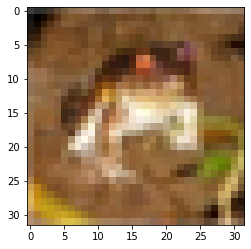

Epoch 1/10
20/20 [==============================] - 3s 115ms/step - loss: 2.2945 - accuracy: 0.1179 - val_loss: 2.2648 - val_accuracy: 0.1569
Epoch 2/10
20/20 [==============================] - 2s 101ms/step - loss: 2.2486 - accuracy: 0.1685 - val_loss: 2.2280 - val_accuracy: 0.1859
Epoch 3/10
20/20 [==============================] - 2s 100ms/step - loss: 2.2137 - accuracy: 0.1971 - val_loss: 2.1960 - val_accuracy: 0.2051
Epoch 4/10
20/20 [==============================] - 2s 100ms/step - loss: 2.1831 - accuracy: 0.2137 - val_loss: 2.1678 - val_accuracy: 0.2172
Epoch 5/10
20/20 [==============================] - 2s 100ms/step - loss: 2.1559 - accuracy: 0.2262 - val_loss: 2.1430 - val_accuracy: 0.2295
Epoch 6/10
20/20 [==============================] - 2s 100ms/step - loss: 2.1315 - accuracy: 0.2343 - val_loss: 2.1205 - val_accuracy: 0.2356
Epoch 7/10
20/20 [==============================] - 2s 100ms/step - loss: 2.1093 - accuracy: 0.2419 - val_loss: 2.1001 - val_accuracy: 0.2393
Epoch 

In [ ]:
x_train,y_train,x_test, y_test=dataset(1)
fig, ax = plt.subplots(1,1)

ax.imshow(x_train[0])
plt.show()
res=[]
 
# create header
head = ["hidden node","test loss","test accuracy"]
 
for hidden_node in hidden_nodes:
  model=model_temp(10,hidden_node)
  model=model_compile(model,'SGD')
  model=train(model)
  result=test_pred(model)
  res.append([2,hidden_node,result[0],result[1]])

In [ ]:
# display table
print(tabulate(res, headers=head, tablefmt="grid"))

+----+---------------+-------------+-----------------+
|    |   hidden node |   test loss |   test accuracy |
+====+===============+=============+=================+
|  2 |           128 |     2.04366 |          0.266  |
+----+---------------+-------------+-----------------+
|  2 |           256 |     1.96686 |          0.322  |
+----+---------------+-------------+-----------------+
|  2 |           512 |     1.9365  |          0.3268 |
+----+---------------+-------------+-----------------+


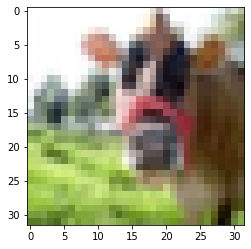

Epoch 1/10
20/20 [==============================] - 3s 120ms/step - loss: 4.6233 - accuracy: 0.0084 - val_loss: 4.6084 - val_accuracy: 0.0106
Epoch 2/10
20/20 [==============================] - 2s 106ms/step - loss: 4.6060 - accuracy: 0.0099 - val_loss: 4.5993 - val_accuracy: 0.0121
Epoch 3/10
20/20 [==============================] - 2s 107ms/step - loss: 4.5985 - accuracy: 0.0125 - val_loss: 4.5935 - val_accuracy: 0.0132
Epoch 4/10
20/20 [==============================] - 2s 107ms/step - loss: 4.5934 - accuracy: 0.0139 - val_loss: 4.5889 - val_accuracy: 0.0156
Epoch 5/10
20/20 [==============================] - 2s 107ms/step - loss: 4.5891 - accuracy: 0.0158 - val_loss: 4.5847 - val_accuracy: 0.0167
Epoch 6/10
20/20 [==============================] - 2s 106ms/step - loss: 4.5852 - accuracy: 0.0173 - val_loss: 4.5808 - val_accuracy: 0.0168
Epoch 7/10
20/20 [==============================] - 2s 106ms/step - loss: 4.5814 - accuracy: 0.0181 - val_loss: 4.5769 - val_accuracy: 0.0188
Epoch 

In [ ]:
x_train,y_train,x_test, y_test=dataset(2)
fig, ax = plt.subplots(1,1)

ax.imshow(x_train[0])
plt.show()
res=[]
 
# create header
head = ["hidden node","test loss","test accuracy"]
 
for hidden_node in hidden_nodes:
  model=model_temp(100,hidden_node)
  model=model_compile(model,'SGD')
  model=train(model)
  result=test_pred(model)
  res.append([2,hidden_node,result[0],result[1]])

In [ ]:
# display table
print(tabulate(res, headers=head, tablefmt="grid"))

+----+---------------+-------------+-----------------+
|    |   hidden node |   test loss |   test accuracy |
+====+===============+=============+=================+
|  2 |           128 |     4.56729 |          0.0184 |
+----+---------------+-------------+-----------------+
|  2 |           256 |     4.55567 |          0.0288 |
+----+---------------+-------------+-----------------+
|  2 |           512 |     4.49746 |          0.043  |
+----+---------------+-------------+-----------------+


# Hidden layer 4
No Regularization

In [ ]:
def dataset(data):
  if data==1:
    (x_train, y_train), (x_test, y_test) =tf.keras.datasets.cifar10.load_data() 
    y_train = y_train.flatten()
    y_test = y_test.flatten()
    y_train=tf.one_hot(y_train,10, on_value=None, off_value=None, axis=None, dtype=None, name=None)
    y_test=tf.one_hot(
        y_test,10, on_value=None, off_value=None, axis=None, dtype=None, name=None)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
      
    # normalize image pixel values by dividing 
    # by 255
    gray_scale = 255
    x_train /= gray_scale
    x_test /= gray_scale
  else:
    (x_train, y_train), (x_test, y_test) =tf.keras.datasets.cifar100.load_data(label_mode="fine") 
    y_train = y_train.flatten()
    y_test = y_test.flatten()
    y_train=tf.one_hot( y_train,100, on_value=None, off_value=None, axis=None, dtype=None, name=None)
    y_test=tf.one_hot(
        y_test,100, on_value=None, off_value=None, axis=None, dtype=None, name=None)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
      
    # normalize image pixel values by dividing 
    # by 255
    gray_scale = 255
    x_train /= gray_scale
    x_test /= gray_scale
  return x_train,y_train,x_test, y_test
def model_temp(label_dim,hidden_node):
  model = Sequential([
    
    # reshape 28 row * 28 column data to 28*28 rows
    Flatten(input_shape=(32, 32, 3)),
    
      # dense layer 1
    Dense(hidden_node, activation='relu'),  
    
    # dense layer 2
    Dense(hidden_node, activation='relu'), 
    #dense layer 3
    Dense(hidden_node, activation='relu'),
    #dense layer 4 
    Dense(hidden_node, activation='relu'), 
      # output layer
    Dense(label_dim, activation='softmax'),  
])
  return model
def model_compile(model,opt):
  model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model
def train(model):
  model.fit(x_train, y_train, epochs=10, 
          batch_size=2000, 
          validation_split=0.2)
  return model
def test_pred(model):
  results = model.evaluate(x_test,  y_test, verbose = 0)
  return results

In [ ]:
hidden_nodes=[128,256,512]

Adam

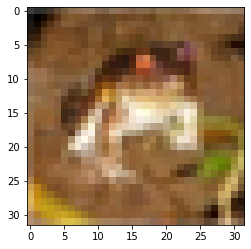

Epoch 1/10
20/20 [==============================] - 3s 121ms/step - loss: 2.1620 - accuracy: 0.1949 - val_loss: 2.0303 - val_accuracy: 0.2583
Epoch 2/10
20/20 [==============================] - 2s 107ms/step - loss: 1.9402 - accuracy: 0.2994 - val_loss: 1.9018 - val_accuracy: 0.3225
Epoch 3/10
20/20 [==============================] - 2s 106ms/step - loss: 1.8528 - accuracy: 0.3361 - val_loss: 1.8298 - val_accuracy: 0.3482
Epoch 4/10
20/20 [==============================] - 2s 107ms/step - loss: 1.7912 - accuracy: 0.3610 - val_loss: 1.7986 - val_accuracy: 0.3548
Epoch 5/10
20/20 [==============================] - 2s 107ms/step - loss: 1.7519 - accuracy: 0.3747 - val_loss: 1.7394 - val_accuracy: 0.3821
Epoch 6/10
20/20 [==============================] - 2s 107ms/step - loss: 1.7078 - accuracy: 0.3925 - val_loss: 1.7069 - val_accuracy: 0.3933
Epoch 7/10
20/20 [==============================] - 2s 106ms/step - loss: 1.6758 - accuracy: 0.4026 - val_loss: 1.6929 - val_accuracy: 0.3977
Epoch 

In [ ]:
x_train,y_train,x_test, y_test=dataset(1)
fig, ax = plt.subplots(1,1)

ax.imshow(x_train[0])
plt.show()
res=[]
 
# create header
head = ["hidden node","test loss","test accuracy"]
 
for hidden_node in hidden_nodes:
  model=model_temp(10,hidden_node)
  model=model_compile(model,'Adam')
  model=train(model)
  result=test_pred(model)
  res.append([2,hidden_node,result[0],result[1]])

In [ ]:
# display table
print(tabulate(res, headers=head, tablefmt="grid"))

+----+---------------+-------------+-----------------+
|    |   hidden node |   test loss |   test accuracy |
+====+===============+=============+=================+
|  2 |           128 |     1.60822 |          0.4255 |
+----+---------------+-------------+-----------------+
|  2 |           256 |     1.58932 |          0.4356 |
+----+---------------+-------------+-----------------+
|  2 |           512 |     1.52251 |          0.46   |
+----+---------------+-------------+-----------------+


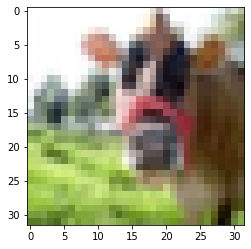

Epoch 1/10
20/20 [==============================] - 3s 123ms/step - loss: 4.5682 - accuracy: 0.0180 - val_loss: 4.4515 - val_accuracy: 0.0259
Epoch 2/10
20/20 [==============================] - 2s 110ms/step - loss: 4.3009 - accuracy: 0.0458 - val_loss: 4.1646 - val_accuracy: 0.0645
Epoch 3/10
20/20 [==============================] - 2s 109ms/step - loss: 4.0881 - accuracy: 0.0746 - val_loss: 4.0284 - val_accuracy: 0.0901
Epoch 4/10
20/20 [==============================] - 2s 108ms/step - loss: 3.9627 - accuracy: 0.0919 - val_loss: 3.9403 - val_accuracy: 0.0932
Epoch 5/10
20/20 [==============================] - 2s 109ms/step - loss: 3.8729 - accuracy: 0.1049 - val_loss: 3.8460 - val_accuracy: 0.1139
Epoch 6/10
20/20 [==============================] - 2s 110ms/step - loss: 3.7879 - accuracy: 0.1200 - val_loss: 3.7906 - val_accuracy: 0.1235
Epoch 7/10
20/20 [==============================] - 2s 111ms/step - loss: 3.7170 - accuracy: 0.1354 - val_loss: 3.7457 - val_accuracy: 0.1350
Epoch 

In [ ]:
x_train,y_train,x_test, y_test=dataset(2)
fig, ax = plt.subplots(1,1)

ax.imshow(x_train[0])
plt.show()
res=[]
 
# create header
head = ["hidden node","test loss","test accuracy"]
 
for hidden_node in hidden_nodes:
  model=model_temp(100,hidden_node)
  model=model_compile(model,'Adam')
  model=train(model)
  result=test_pred(model)
  res.append([2,hidden_node,result[0],result[1]])

In [ ]:
# display table
print(tabulate(res, headers=head, tablefmt="grid"))

+----+---------------+-------------+-----------------+
|    |   hidden node |   test loss |   test accuracy |
+====+===============+=============+=================+
|  2 |           128 |     3.60774 |          0.156  |
+----+---------------+-------------+-----------------+
|  2 |           256 |     3.47141 |          0.1854 |
+----+---------------+-------------+-----------------+
|  2 |           512 |     3.39874 |          0.1931 |
+----+---------------+-------------+-----------------+


SGD

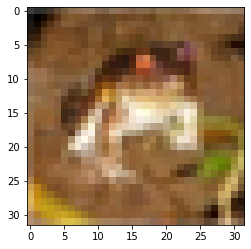

Epoch 1/10
20/20 [==============================] - 3s 118ms/step - loss: 2.3078 - accuracy: 0.1020 - val_loss: 2.2871 - val_accuracy: 0.1214
Epoch 2/10
20/20 [==============================] - 2s 105ms/step - loss: 2.2757 - accuracy: 0.1394 - val_loss: 2.2634 - val_accuracy: 0.1499
Epoch 3/10
20/20 [==============================] - 2s 104ms/step - loss: 2.2531 - accuracy: 0.1571 - val_loss: 2.2409 - val_accuracy: 0.1664
Epoch 4/10
20/20 [==============================] - 2s 103ms/step - loss: 2.2290 - accuracy: 0.1814 - val_loss: 2.2158 - val_accuracy: 0.1947
Epoch 5/10
20/20 [==============================] - 2s 103ms/step - loss: 2.2022 - accuracy: 0.2087 - val_loss: 2.1885 - val_accuracy: 0.2213
Epoch 6/10
20/20 [==============================] - 2s 103ms/step - loss: 2.1739 - accuracy: 0.2298 - val_loss: 2.1611 - val_accuracy: 0.2331
Epoch 7/10
20/20 [==============================] - 2s 104ms/step - loss: 2.1451 - accuracy: 0.2436 - val_loss: 2.1334 - val_accuracy: 0.2540
Epoch 

In [ ]:
x_train,y_train,x_test, y_test=dataset(1)
fig, ax = plt.subplots(1,1)

ax.imshow(x_train[0])
plt.show()
res=[]
 
# create header
head = ["hidden node","test loss","test accuracy"]
 
for hidden_node in hidden_nodes:
  model=model_temp(10,hidden_node)
  model=model_compile(model,'SGD')
  model=train(model)
  result=test_pred(model)
  res.append([4,hidden_node,result[0],result[1]])

In [ ]:
# display table
print(tabulate(res, headers=head, tablefmt="grid"))

+----+---------------+-------------+-----------------+
|    |   hidden node |   test loss |   test accuracy |
+====+===============+=============+=================+
|  4 |           128 |     2.05512 |          0.2719 |
+----+---------------+-------------+-----------------+
|  4 |           256 |     1.97946 |          0.3023 |
+----+---------------+-------------+-----------------+
|  4 |           512 |     1.97195 |          0.3103 |
+----+---------------+-------------+-----------------+


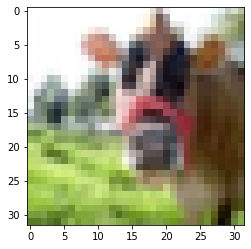

Epoch 1/10
20/20 [==============================] - 3s 139ms/step - loss: 4.6215 - accuracy: 0.0105 - val_loss: 4.6157 - val_accuracy: 0.0113
Epoch 2/10
20/20 [==============================] - 2s 109ms/step - loss: 4.6103 - accuracy: 0.0114 - val_loss: 4.6098 - val_accuracy: 0.0123
Epoch 3/10
20/20 [==============================] - 2s 107ms/step - loss: 4.6058 - accuracy: 0.0112 - val_loss: 4.6066 - val_accuracy: 0.0128
Epoch 4/10
20/20 [==============================] - 2s 108ms/step - loss: 4.6029 - accuracy: 0.0113 - val_loss: 4.6042 - val_accuracy: 0.0133
Epoch 5/10
20/20 [==============================] - 2s 107ms/step - loss: 4.6006 - accuracy: 0.0114 - val_loss: 4.6022 - val_accuracy: 0.0132
Epoch 6/10
20/20 [==============================] - 2s 107ms/step - loss: 4.5986 - accuracy: 0.0115 - val_loss: 4.6004 - val_accuracy: 0.0132
Epoch 7/10
20/20 [==============================] - 2s 106ms/step - loss: 4.5968 - accuracy: 0.0121 - val_loss: 4.5987 - val_accuracy: 0.0136
Epoch 

In [ ]:
x_train,y_train,x_test, y_test=dataset(2)
fig, ax = plt.subplots(1,1)

ax.imshow(x_train[0])
plt.show()
res=[]
 
# create header
head = ["hidden node","test loss","test accuracy"]
 
for hidden_node in hidden_nodes:
  model=model_temp(100,hidden_node)
  model=model_compile(model,'SGD')
  model=train(model)
  result=test_pred(model)
  res.append([4,hidden_node,result[0],result[1]])

In [ ]:
# display table
print(tabulate(res, headers=head, tablefmt="grid"))

+----+---------------+-------------+-----------------+
|    |   hidden node |   test loss |   test accuracy |
+====+===============+=============+=================+
|  4 |           128 |     4.59284 |          0.0142 |
+----+---------------+-------------+-----------------+
|  4 |           256 |     4.57166 |          0.0243 |
+----+---------------+-------------+-----------------+
|  4 |           512 |     4.52512 |          0.0397 |
+----+---------------+-------------+-----------------+


# Hidden layer 5
No Regularization

In [ ]:
def dataset(data):
  if data==1:
    (x_train, y_train), (x_test, y_test) =tf.keras.datasets.cifar10.load_data() 
    y_train = y_train.flatten()
    y_test = y_test.flatten()
    y_train=tf.one_hot(y_train,10, on_value=None, off_value=None, axis=None, dtype=None, name=None)
    y_test=tf.one_hot(
        y_test,10, on_value=None, off_value=None, axis=None, dtype=None, name=None)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
      
    # normalize image pixel values by dividing 
    # by 255
    gray_scale = 255
    x_train /= gray_scale
    x_test /= gray_scale
  else:
    (x_train, y_train), (x_test, y_test) =tf.keras.datasets.cifar100.load_data(label_mode="fine") 
    y_train = y_train.flatten()
    y_test = y_test.flatten()
    y_train=tf.one_hot( y_train,100, on_value=None, off_value=None, axis=None, dtype=None, name=None)
    y_test=tf.one_hot(
        y_test,100, on_value=None, off_value=None, axis=None, dtype=None, name=None)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
      
    # normalize image pixel values by dividing 
    # by 255
    gray_scale = 255
    x_train /= gray_scale
    x_test /= gray_scale
  return x_train,y_train,x_test, y_test
def model_temp(label_dim,hidden_node):
  model = Sequential([
    
    # reshape 28 row * 28 column data to 28*28 rows
    Flatten(input_shape=(32, 32, 3)),
    
      # dense layer 1
    Dense(hidden_node, activation='relu'),  
    
    # dense layer 2
    Dense(hidden_node, activation='relu'), 
    #dense layer 3
    Dense(hidden_node, activation='relu'),
    #dense layer 4 
    Dense(hidden_node, activation='relu'), 
    #dense layer 5
    Dense(hidden_node, activation='relu'), 
      # output layer
    Dense(label_dim, activation='softmax'),  
])
  return model
def model_compile(model,opt):
  model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model
def train(model):
  model.fit(x_train, y_train, epochs=10, 
          batch_size=2000, 
          validation_split=0.2)
  return model
def test_pred(model):
  results = model.evaluate(x_test,  y_test, verbose = 0)
  return results

In [ ]:
hidden_nodes=[128,256,512]

Adam

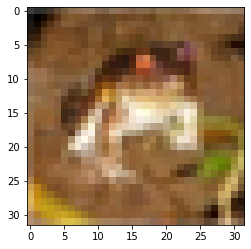

Epoch 1/10
20/20 [==============================] - 3s 123ms/step - loss: 2.1497 - accuracy: 0.1915 - val_loss: 2.0065 - val_accuracy: 0.2611
Epoch 2/10
20/20 [==============================] - 2s 111ms/step - loss: 1.9380 - accuracy: 0.2917 - val_loss: 1.9113 - val_accuracy: 0.3120
Epoch 3/10
20/20 [==============================] - 2s 109ms/step - loss: 1.8468 - accuracy: 0.3347 - val_loss: 1.8414 - val_accuracy: 0.3318
Epoch 4/10
20/20 [==============================] - 2s 111ms/step - loss: 1.7835 - accuracy: 0.3582 - val_loss: 1.7738 - val_accuracy: 0.3625
Epoch 5/10
20/20 [==============================] - 2s 112ms/step - loss: 1.7425 - accuracy: 0.3773 - val_loss: 1.7528 - val_accuracy: 0.3766
Epoch 6/10
20/20 [==============================] - 2s 110ms/step - loss: 1.6941 - accuracy: 0.3934 - val_loss: 1.7102 - val_accuracy: 0.3891
Epoch 7/10
20/20 [==============================] - 2s 109ms/step - loss: 1.6712 - accuracy: 0.4039 - val_loss: 1.6938 - val_accuracy: 0.3984
Epoch 

In [ ]:
x_train,y_train,x_test, y_test=dataset(1)
fig, ax = plt.subplots(1,1)

ax.imshow(x_train[0])
plt.show()
res=[]
 
# create header
head = ["hidden node","test loss","test accuracy"]
 
for hidden_node in hidden_nodes:
  model=model_temp(10,hidden_node)
  model=model_compile(model,'Adam')
  model=train(model)
  result=test_pred(model)
  res.append([2,hidden_node,result[0],result[1]])

In [ ]:
# display table
print(tabulate(res, headers=head, tablefmt="grid"))

+----+---------------+-------------+-----------------+
|    |   hidden node |   test loss |   test accuracy |
+====+===============+=============+=================+
|  2 |           128 |     1.59175 |          0.4342 |
+----+---------------+-------------+-----------------+
|  2 |           256 |     1.53791 |          0.4536 |
+----+---------------+-------------+-----------------+
|  2 |           512 |     1.51787 |          0.4519 |
+----+---------------+-------------+-----------------+


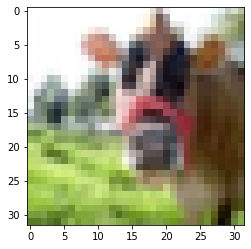

Epoch 1/10
20/20 [==============================] - 3s 131ms/step - loss: 4.5746 - accuracy: 0.0208 - val_loss: 4.4733 - val_accuracy: 0.0382
Epoch 2/10
20/20 [==============================] - 2s 119ms/step - loss: 4.2903 - accuracy: 0.0526 - val_loss: 4.1505 - val_accuracy: 0.0648
Epoch 3/10
20/20 [==============================] - 2s 118ms/step - loss: 4.0618 - accuracy: 0.0738 - val_loss: 4.0247 - val_accuracy: 0.0725
Epoch 4/10
20/20 [==============================] - 2s 117ms/step - loss: 3.9692 - accuracy: 0.0869 - val_loss: 3.9754 - val_accuracy: 0.0847
Epoch 5/10
20/20 [==============================] - 2s 117ms/step - loss: 3.8810 - accuracy: 0.1010 - val_loss: 3.8718 - val_accuracy: 0.1077
Epoch 6/10
20/20 [==============================] - 2s 116ms/step - loss: 3.8028 - accuracy: 0.1152 - val_loss: 3.8040 - val_accuracy: 0.1221
Epoch 7/10
20/20 [==============================] - 2s 116ms/step - loss: 3.7488 - accuracy: 0.1265 - val_loss: 3.7636 - val_accuracy: 0.1236
Epoch 

In [ ]:
x_train,y_train,x_test, y_test=dataset(2)
fig, ax = plt.subplots(1,1)

ax.imshow(x_train[0])
plt.show()
res=[]
 
# create header
head = ["hidden node","test loss","test accuracy"]
 
for hidden_node in hidden_nodes:
  model=model_temp(100,hidden_node)
  model=model_compile(model,'Adam')
  model=train(model)
  result=test_pred(model)
  res.append([2,hidden_node,result[0],result[1]])

In [ ]:
# display table
print(tabulate(res, headers=head, tablefmt="grid"))

+----+---------------+-------------+-----------------+
|    |   hidden node |   test loss |   test accuracy |
+====+===============+=============+=================+
|  2 |           128 |     3.63588 |          0.1542 |
+----+---------------+-------------+-----------------+
|  2 |           256 |     3.46335 |          0.1846 |
+----+---------------+-------------+-----------------+
|  2 |           512 |     3.41024 |          0.194  |
+----+---------------+-------------+-----------------+


SGD

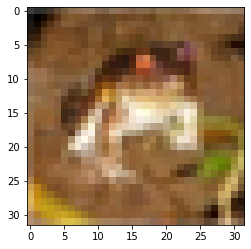

Epoch 1/10
20/20 [==============================] - 3s 125ms/step - loss: 2.3040 - accuracy: 0.1022 - val_loss: 2.2983 - val_accuracy: 0.1128
Epoch 2/10
20/20 [==============================] - 2s 109ms/step - loss: 2.2932 - accuracy: 0.1296 - val_loss: 2.2893 - val_accuracy: 0.1403
Epoch 3/10
20/20 [==============================] - 2s 109ms/step - loss: 2.2845 - accuracy: 0.1484 - val_loss: 2.2804 - val_accuracy: 0.1513
Epoch 4/10
20/20 [==============================] - 2s 108ms/step - loss: 2.2753 - accuracy: 0.1574 - val_loss: 2.2711 - val_accuracy: 0.1639
Epoch 5/10
20/20 [==============================] - 2s 108ms/step - loss: 2.2653 - accuracy: 0.1681 - val_loss: 2.2604 - val_accuracy: 0.1718
Epoch 6/10
20/20 [==============================] - 2s 109ms/step - loss: 2.2534 - accuracy: 0.1779 - val_loss: 2.2476 - val_accuracy: 0.1797
Epoch 7/10
20/20 [==============================] - 2s 109ms/step - loss: 2.2393 - accuracy: 0.1871 - val_loss: 2.2325 - val_accuracy: 0.1920
Epoch 

In [ ]:
x_train,y_train,x_test, y_test=dataset(1)
fig, ax = plt.subplots(1,1)

ax.imshow(x_train[0])
plt.show()
res=[]
 
# create header
head = ["hidden node","test loss","test accuracy"]
 
for hidden_node in hidden_nodes:
  model=model_temp(10,hidden_node)
  model=model_compile(model,'SGD')
  model=train(model)
  result=test_pred(model)
  res.append([5,hidden_node,result[0],result[1]])

In [ ]:
# display table
print(tabulate(res, headers=head, tablefmt="grid"))

+----+---------------+-------------+-----------------+
|    |   hidden node |   test loss |   test accuracy |
+====+===============+=============+=================+
|  5 |           128 |     2.16369 |          0.2209 |
+----+---------------+-------------+-----------------+
|  5 |           256 |     2.02101 |          0.269  |
+----+---------------+-------------+-----------------+
|  5 |           512 |     1.99734 |          0.299  |
+----+---------------+-------------+-----------------+


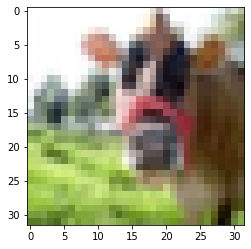

Epoch 1/10
20/20 [==============================] - 3s 125ms/step - loss: 4.6085 - accuracy: 0.0110 - val_loss: 4.6057 - val_accuracy: 0.0121
Epoch 2/10
20/20 [==============================] - 2s 111ms/step - loss: 4.6050 - accuracy: 0.0114 - val_loss: 4.6031 - val_accuracy: 0.0116
Epoch 3/10
20/20 [==============================] - 2s 111ms/step - loss: 4.6029 - accuracy: 0.0117 - val_loss: 4.6011 - val_accuracy: 0.0116
Epoch 4/10
20/20 [==============================] - 2s 112ms/step - loss: 4.6013 - accuracy: 0.0110 - val_loss: 4.5997 - val_accuracy: 0.0115
Epoch 5/10
20/20 [==============================] - 2s 110ms/step - loss: 4.5999 - accuracy: 0.0115 - val_loss: 4.5984 - val_accuracy: 0.0113
Epoch 6/10
20/20 [==============================] - 2s 111ms/step - loss: 4.5986 - accuracy: 0.0121 - val_loss: 4.5971 - val_accuracy: 0.0111
Epoch 7/10
20/20 [==============================] - 2s 114ms/step - loss: 4.5973 - accuracy: 0.0115 - val_loss: 4.5958 - val_accuracy: 0.0116
Epoch 

In [ ]:
x_train,y_train,x_test, y_test=dataset(2)
fig, ax = plt.subplots(1,1)

ax.imshow(x_train[0])
plt.show()
res=[]
 
# create header
head = ["hidden node","test loss","test accuracy"]
 
for hidden_node in hidden_nodes:
  model=model_temp(100,hidden_node)
  model=model_compile(model,'SGD')
  model=train(model)
  result=test_pred(model)
  res.append([5,hidden_node,result[0],result[1]])

In [ ]:
# display table
print(tabulate(res, headers=head, tablefmt="grid"))

+----+---------------+-------------+-----------------+
|    |   hidden node |   test loss |   test accuracy |
+====+===============+=============+=================+
|  5 |           128 |     4.59189 |          0.0114 |
+----+---------------+-------------+-----------------+
|  5 |           256 |     4.5823  |          0.0232 |
+----+---------------+-------------+-----------------+
|  5 |           512 |     4.56829 |          0.0323 |
+----+---------------+-------------+-----------------+


# With regularization 
# hidden layer 2

In [ ]:
def dataset(data):
  if data==1:
    (x_train, y_train), (x_test, y_test) =tf.keras.datasets.cifar10.load_data() 
    y_train = y_train.flatten()
    y_test = y_test.flatten()
    y_train=tf.one_hot(y_train,10, on_value=None, off_value=None, axis=None, dtype=None, name=None)
    y_test=tf.one_hot(
        y_test,10, on_value=None, off_value=None, axis=None, dtype=None, name=None)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
      
    # normalize image pixel values by dividing 
    # by 255
    gray_scale = 255
    x_train /= gray_scale
    x_test /= gray_scale
  else:
    (x_train, y_train), (x_test, y_test) =tf.keras.datasets.cifar100.load_data(label_mode="fine") 
    y_train = y_train.flatten()
    y_test = y_test.flatten()
    y_train=tf.one_hot( y_train,100, on_value=None, off_value=None, axis=None, dtype=None, name=None)
    y_test=tf.one_hot(
        y_test,100, on_value=None, off_value=None, axis=None, dtype=None, name=None)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
      
    # normalize image pixel values by dividing 
    # by 255
    gray_scale = 255
    x_train /= gray_scale
    x_test /= gray_scale
  return x_train,y_train,x_test, y_test
def model_temp(label_dim,hidden_node,dropout):
  model = Sequential([
    
    # reshape 28 row * 28 column data to 28*28 rows
    Flatten(input_shape=(32, 32, 3)),
    
      # dense layer 1
    Dense(hidden_node, activation='relu'),  
    Dropout(dropout),
    # dense layer 2
    Dense(hidden_node, activation='relu'), 
    Dropout(dropout),
      # output layer
    Dense(label_dim, activation='softmax'),  
])
  return model
def model_compile(model,opt):
  model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model
def train(model):
  model.fit(x_train, y_train, epochs=10, 
          batch_size=2000, 
          validation_split=0.2)
  return model
def test_pred(model):
  results = model.evaluate(x_test,  y_test, verbose = 0)
  return results

In [ ]:
hidden_nodes=[128,256,512]
Drop_out=[0.2,0.4,0.6]

 Adam

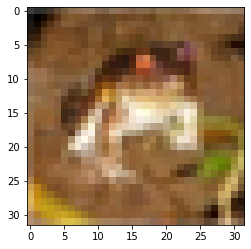

Epoch 1/10
20/20 [==============================] - 3s 108ms/step - loss: 2.2718 - accuracy: 0.1588 - val_loss: 2.1008 - val_accuracy: 0.2182
Epoch 2/10
20/20 [==============================] - 2s 97ms/step - loss: 2.0673 - accuracy: 0.2340 - val_loss: 1.9571 - val_accuracy: 0.3121
Epoch 3/10
20/20 [==============================] - 2s 96ms/step - loss: 1.9584 - accuracy: 0.2889 - val_loss: 1.8888 - val_accuracy: 0.3271
Epoch 4/10
20/20 [==============================] - 2s 95ms/step - loss: 1.9077 - accuracy: 0.3086 - val_loss: 1.8395 - val_accuracy: 0.3508
Epoch 5/10
20/20 [==============================] - 2s 95ms/step - loss: 1.8753 - accuracy: 0.3203 - val_loss: 1.8098 - val_accuracy: 0.3620
Epoch 6/10
20/20 [==============================] - 2s 97ms/step - loss: 1.8419 - accuracy: 0.3362 - val_loss: 1.7841 - val_accuracy: 0.3631
Epoch 7/10
20/20 [==============================] - 2s 97ms/step - loss: 1.8237 - accuracy: 0.3405 - val_loss: 1.7621 - val_accuracy: 0.3768
Epoch 8/10
2

In [ ]:
x_train,y_train,x_test, y_test=dataset(1)
fig, ax = plt.subplots(1,1)

ax.imshow(x_train[0])
plt.show()
res=[]
 
# create header
head = ["hidden layer","hidden node","dropout","test loss","test accuracy"]
for drop in Drop_out:
  for hidden_node in hidden_nodes:
    model=model_temp(10,hidden_node,drop)
    model=model_compile(model,'Adam')
    model=train(model)
    result=test_pred(model)
    res.append([2,hidden_node,drop,result[0],result[1]])

In [ ]:
# display table
print(tabulate(res, headers=head, tablefmt="grid"))

+----------------+---------------+-----------+-------------+-----------------+
|   hidden layer |   hidden node |   dropout |   test loss |   test accuracy |
+================+===============+===========+=============+=================+
|              2 |           128 |       0.2 |     1.70334 |          0.3957 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           256 |       0.2 |     1.61992 |          0.4291 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           512 |       0.2 |     1.58474 |          0.4352 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           128 |       0.4 |     1.84008 |          0.3534 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           256 |       0.4 |     1.71244 |          0.3971 |
+----------------+---------------+-----------+------

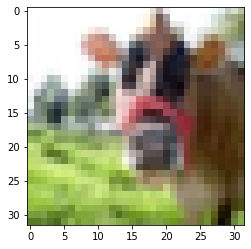

Epoch 1/10
20/20 [==============================] - 3s 115ms/step - loss: 4.5953 - accuracy: 0.0154 - val_loss: 4.5156 - val_accuracy: 0.0305
Epoch 2/10
20/20 [==============================] - 2s 102ms/step - loss: 4.4545 - accuracy: 0.0320 - val_loss: 4.3178 - val_accuracy: 0.0484
Epoch 3/10
20/20 [==============================] - 2s 103ms/step - loss: 4.2878 - accuracy: 0.0480 - val_loss: 4.1384 - val_accuracy: 0.0687
Epoch 4/10
20/20 [==============================] - 2s 104ms/step - loss: 4.1765 - accuracy: 0.0607 - val_loss: 4.0531 - val_accuracy: 0.0874
Epoch 5/10
20/20 [==============================] - 2s 102ms/step - loss: 4.1051 - accuracy: 0.0671 - val_loss: 3.9753 - val_accuracy: 0.0980
Epoch 6/10
20/20 [==============================] - 2s 104ms/step - loss: 4.0353 - accuracy: 0.0789 - val_loss: 3.9051 - val_accuracy: 0.1115
Epoch 7/10
20/20 [==============================] - 2s 104ms/step - loss: 3.9811 - accuracy: 0.0866 - val_loss: 3.8420 - val_accuracy: 0.1194
Epoch 

In [ ]:
x_train,y_train,x_test, y_test=dataset(2)
fig, ax = plt.subplots(1,1)

ax.imshow(x_train[0])
plt.show()
res=[]
 
# create header
head = ["hidden layer","hidden node","dropout","test loss","test accuracy"]
for drop in Drop_out:
  for hidden_node in hidden_nodes:
    model=model_temp(100,hidden_node,drop)
    model=model_compile(model,'Adam')
    model=train(model)
    result=test_pred(model)
    res.append([2,hidden_node,drop,result[0],result[1]])

In [ ]:
# display table
print(tabulate(res, headers=head, tablefmt="grid"))

+----------------+---------------+-----------+-------------+-----------------+
|   hidden layer |   hidden node |   dropout |   test loss |   test accuracy |
+================+===============+===========+=============+=================+
|              2 |           128 |       0.2 |     3.74374 |          0.1357 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           256 |       0.2 |     3.62456 |          0.1625 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           512 |       0.2 |     3.46399 |          0.193  |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           128 |       0.4 |     4.252   |          0.056  |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           256 |       0.4 |     3.96695 |          0.1024 |
+----------------+---------------+-----------+------

 SGD

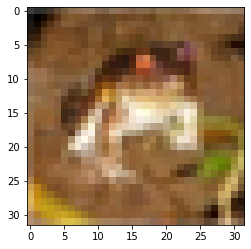

Epoch 1/10
20/20 [==============================] - 3s 112ms/step - loss: 2.3354 - accuracy: 0.1186 - val_loss: 2.2569 - val_accuracy: 0.1630
Epoch 2/10
20/20 [==============================] - 2s 97ms/step - loss: 2.2638 - accuracy: 0.1504 - val_loss: 2.2224 - val_accuracy: 0.2069
Epoch 3/10
20/20 [==============================] - 2s 100ms/step - loss: 2.2330 - accuracy: 0.1745 - val_loss: 2.1926 - val_accuracy: 0.2295
Epoch 4/10
20/20 [==============================] - 2s 99ms/step - loss: 2.2060 - accuracy: 0.1881 - val_loss: 2.1649 - val_accuracy: 0.2480
Epoch 5/10
20/20 [==============================] - 2s 101ms/step - loss: 2.1834 - accuracy: 0.1975 - val_loss: 2.1393 - val_accuracy: 0.2512
Epoch 6/10
20/20 [==============================] - 2s 98ms/step - loss: 2.1630 - accuracy: 0.2078 - val_loss: 2.1171 - val_accuracy: 0.2598
Epoch 7/10
20/20 [==============================] - 2s 97ms/step - loss: 2.1446 - accuracy: 0.2130 - val_loss: 2.0968 - val_accuracy: 0.2636
Epoch 8/10

In [ ]:
x_train,y_train,x_test, y_test=dataset(1)
fig, ax = plt.subplots(1,1)

ax.imshow(x_train[0])
plt.show()
res=[]
 
# create header
head = ["hidden layer","hidden node","dropout","test loss","test accuracy"]
for drop in Drop_out:
  for hidden_node in hidden_nodes:
    model=model_temp(10,hidden_node,drop)
    model=model_compile(model,'SGD')
    model=train(model)
    result=test_pred(model)
    res.append([2,hidden_node,drop,result[0],result[1]])

In [ ]:
# display table
print(tabulate(res, headers=head, tablefmt="grid"))

+----------------+---------------+-----------+-------------+-----------------+
|   hidden layer |   hidden node |   dropout |   test loss |   test accuracy |
+================+===============+===========+=============+=================+
|              2 |           128 |       0.2 |     2.04085 |          0.2821 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           256 |       0.2 |     1.98561 |          0.3115 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           512 |       0.2 |     1.95872 |          0.3174 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           128 |       0.4 |     2.08861 |          0.2768 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           256 |       0.4 |     2.02702 |          0.2994 |
+----------------+---------------+-----------+------

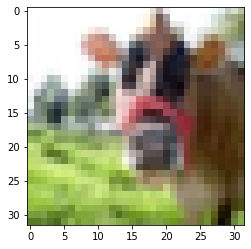

Epoch 1/10
20/20 [==============================] - 3s 124ms/step - loss: 4.6408 - accuracy: 0.0097 - val_loss: 4.6096 - val_accuracy: 0.0086
Epoch 2/10
20/20 [==============================] - 2s 109ms/step - loss: 4.6129 - accuracy: 0.0118 - val_loss: 4.6005 - val_accuracy: 0.0114
Epoch 3/10
20/20 [==============================] - 2s 109ms/step - loss: 4.6047 - accuracy: 0.0125 - val_loss: 4.5960 - val_accuracy: 0.0128
Epoch 4/10
20/20 [==============================] - 2s 108ms/step - loss: 4.6003 - accuracy: 0.0135 - val_loss: 4.5927 - val_accuracy: 0.0165
Epoch 5/10
20/20 [==============================] - 2s 108ms/step - loss: 4.5965 - accuracy: 0.0154 - val_loss: 4.5900 - val_accuracy: 0.0164
Epoch 6/10
20/20 [==============================] - 2s 109ms/step - loss: 4.5944 - accuracy: 0.0158 - val_loss: 4.5871 - val_accuracy: 0.0195
Epoch 7/10
20/20 [==============================] - 2s 108ms/step - loss: 4.5914 - accuracy: 0.0174 - val_loss: 4.5843 - val_accuracy: 0.0213
Epoch 

In [ ]:
x_train,y_train,x_test, y_test=dataset(2)
fig, ax = plt.subplots(1,1)

ax.imshow(x_train[0])
plt.show()
res=[]
 
# create header
head = ["hidden layer","hidden node","dropout","test loss","test accuracy"]
for drop in Drop_out:
  for hidden_node in hidden_nodes:
    model=model_temp(100,hidden_node,drop)
    model=model_compile(model,'SGD')
    model=train(model)
    result=test_pred(model)
    res.append([2,hidden_node,drop,result[0],result[1]])

In [ ]:
# display table
print(tabulate(res, headers=head, tablefmt="grid"))

+----------------+---------------+-----------+-------------+-----------------+
|   hidden layer |   hidden node |   dropout |   test loss |   test accuracy |
+================+===============+===========+=============+=================+
|              2 |           128 |       0.2 |     4.57633 |          0.0244 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           256 |       0.2 |     4.54058 |          0.0299 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           512 |       0.2 |     4.50124 |          0.0385 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           128 |       0.4 |     4.5835  |          0.0192 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           256 |       0.4 |     4.57189 |          0.023  |
+----------------+---------------+-----------+------

# With regularization 
# hidden layer 3

In [ ]:
def dataset(data):
  if data==1:
    (x_train, y_train), (x_test, y_test) =tf.keras.datasets.cifar10.load_data() 
    y_train = y_train.flatten()
    y_test = y_test.flatten()
    y_train=tf.one_hot(y_train,10, on_value=None, off_value=None, axis=None, dtype=None, name=None)
    y_test=tf.one_hot(
        y_test,10, on_value=None, off_value=None, axis=None, dtype=None, name=None)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
      
    # normalize image pixel values by dividing 
    # by 255
    gray_scale = 255
    x_train /= gray_scale
    x_test /= gray_scale
  else:
    (x_train, y_train), (x_test, y_test) =tf.keras.datasets.cifar100.load_data(label_mode="fine") 
    y_train = y_train.flatten()
    y_test = y_test.flatten()
    y_train=tf.one_hot( y_train,100, on_value=None, off_value=None, axis=None, dtype=None, name=None)
    y_test=tf.one_hot(
        y_test,100, on_value=None, off_value=None, axis=None, dtype=None, name=None)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
      
    # normalize image pixel values by dividing 
    # by 255
    gray_scale = 255
    x_train /= gray_scale
    x_test /= gray_scale
  return x_train,y_train,x_test, y_test
def model_temp(label_dim,hidden_node,dropout):
  model = Sequential([
    
    # reshape 28 row * 28 column data to 28*28 rows
    Flatten(input_shape=(32, 32, 3)),
    
      # dense layer 1
    Dense(hidden_node, activation='relu'),  
    Dropout(dropout),
    # dense layer 2
    Dense(hidden_node, activation='relu'), 
    Dropout(dropout),
    Dense(hidden_node, activation='relu'), 
    Dropout(dropout),
      # output layer
    Dense(label_dim, activation='softmax'),  
])
  return model
def model_compile(model,opt):
  model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model
def train(model):
  model.fit(x_train, y_train, epochs=10, 
          batch_size=2000, 
          validation_split=0.2)
  return model
def test_pred(model):
  results = model.evaluate(x_test,  y_test, verbose = 0)
  return results

In [ ]:
hidden_nodes=[128,256,512]
Drop_out=[0.2,0.4,0.6]

 Adam

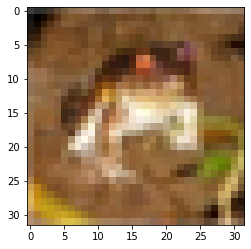

Epoch 1/10
20/20 [==============================] - 3s 119ms/step - loss: 2.2793 - accuracy: 0.1457 - val_loss: 2.1049 - val_accuracy: 0.2180
Epoch 2/10
20/20 [==============================] - 2s 107ms/step - loss: 2.0745 - accuracy: 0.2283 - val_loss: 1.9421 - val_accuracy: 0.3057
Epoch 3/10
20/20 [==============================] - 2s 105ms/step - loss: 1.9596 - accuracy: 0.2814 - val_loss: 1.8702 - val_accuracy: 0.3302
Epoch 4/10
20/20 [==============================] - 2s 104ms/step - loss: 1.9048 - accuracy: 0.3036 - val_loss: 1.8331 - val_accuracy: 0.3457
Epoch 5/10
20/20 [==============================] - 2s 105ms/step - loss: 1.8591 - accuracy: 0.3236 - val_loss: 1.7866 - val_accuracy: 0.3651
Epoch 6/10
20/20 [==============================] - 2s 105ms/step - loss: 1.8404 - accuracy: 0.3323 - val_loss: 1.7584 - val_accuracy: 0.3765
Epoch 7/10
20/20 [==============================] - 2s 107ms/step - loss: 1.8151 - accuracy: 0.3442 - val_loss: 1.7533 - val_accuracy: 0.3792
Epoch 

In [ ]:
x_train,y_train,x_test, y_test=dataset(1)
fig, ax = plt.subplots(1,1)

ax.imshow(x_train[0])
plt.show()
res=[]
 
# create header
head = ["hidden layer","hidden node","dropout","test loss","test accuracy"]
for drop in Drop_out:
  for hidden_node in hidden_nodes:
    model=model_temp(10,hidden_node,drop)
    model=model_compile(model,'Adam')
    model=train(model)
    result=test_pred(model)
    res.append([3,hidden_node,drop,result[0],result[1]])

In [ ]:
# display table
print(tabulate(res, headers=head, tablefmt="grid"))

+----------------+---------------+-----------+-------------+-----------------+
|   hidden layer |   hidden node |   dropout |   test loss |   test accuracy |
+================+===============+===========+=============+=================+
|              2 |           128 |       0.2 |     1.6636  |          0.4125 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           256 |       0.2 |     1.5985  |          0.4351 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           512 |       0.2 |     1.52565 |          0.4588 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           128 |       0.4 |     2.02217 |          0.2416 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           256 |       0.4 |     1.85246 |          0.3405 |
+----------------+---------------+-----------+------

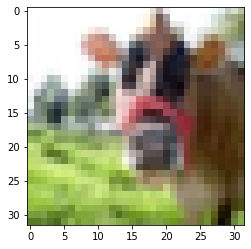

Epoch 1/10
20/20 [==============================] - 3s 128ms/step - loss: 4.6006 - accuracy: 0.0124 - val_loss: 4.5551 - val_accuracy: 0.0179
Epoch 2/10
20/20 [==============================] - 2s 112ms/step - loss: 4.4972 - accuracy: 0.0236 - val_loss: 4.3720 - val_accuracy: 0.0383
Epoch 3/10
20/20 [==============================] - 2s 111ms/step - loss: 4.3437 - accuracy: 0.0358 - val_loss: 4.2049 - val_accuracy: 0.0557
Epoch 4/10
20/20 [==============================] - 2s 113ms/step - loss: 4.2388 - accuracy: 0.0446 - val_loss: 4.1008 - val_accuracy: 0.0680
Epoch 5/10
20/20 [==============================] - 2s 113ms/step - loss: 4.1650 - accuracy: 0.0551 - val_loss: 4.0289 - val_accuracy: 0.0818
Epoch 6/10
20/20 [==============================] - 2s 114ms/step - loss: 4.1165 - accuracy: 0.0617 - val_loss: 3.9979 - val_accuracy: 0.0881
Epoch 7/10
20/20 [==============================] - 2s 113ms/step - loss: 4.0727 - accuracy: 0.0676 - val_loss: 3.9415 - val_accuracy: 0.0946
Epoch 

In [ ]:
x_train,y_train,x_test, y_test=dataset(2)
fig, ax = plt.subplots(1,1)

ax.imshow(x_train[0])
plt.show()
res=[]
 
# create header
head = ["hidden layer","hidden node","dropout","test loss","test accuracy"]
for drop in Drop_out:
  for hidden_node in hidden_nodes:
    model=model_temp(100,hidden_node,drop)
    model=model_compile(model,'Adam')
    model=train(model)
    result=test_pred(model)
    res.append([3,hidden_node,drop,result[0],result[1]])

In [ ]:
# display table
print(tabulate(res, headers=head, tablefmt="grid"))

+----------------+---------------+-----------+-------------+-----------------+
|   hidden layer |   hidden node |   dropout |   test loss |   test accuracy |
+================+===============+===========+=============+=================+
|              2 |           128 |       0.2 |     3.85471 |          0.11   |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           256 |       0.2 |     3.64413 |          0.1489 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           512 |       0.2 |     3.46967 |          0.1841 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           128 |       0.4 |     4.36189 |          0.0336 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           256 |       0.4 |     4.12511 |          0.0704 |
+----------------+---------------+-----------+------

 SGD

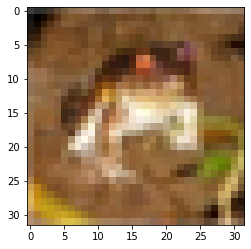

Epoch 1/10
20/20 [==============================] - 3s 120ms/step - loss: 2.3144 - accuracy: 0.1183 - val_loss: 2.2643 - val_accuracy: 0.1544
Epoch 2/10
20/20 [==============================] - 2s 106ms/step - loss: 2.2786 - accuracy: 0.1402 - val_loss: 2.2399 - val_accuracy: 0.1845
Epoch 3/10
20/20 [==============================] - 2s 109ms/step - loss: 2.2579 - accuracy: 0.1543 - val_loss: 2.2188 - val_accuracy: 0.2047
Epoch 4/10
20/20 [==============================] - 2s 108ms/step - loss: 2.2385 - accuracy: 0.1667 - val_loss: 2.1995 - val_accuracy: 0.2174
Epoch 5/10
20/20 [==============================] - 2s 108ms/step - loss: 2.2252 - accuracy: 0.1728 - val_loss: 2.1809 - val_accuracy: 0.2294
Epoch 6/10
20/20 [==============================] - 2s 106ms/step - loss: 2.2104 - accuracy: 0.1786 - val_loss: 2.1648 - val_accuracy: 0.2384
Epoch 7/10
20/20 [==============================] - 2s 107ms/step - loss: 2.1976 - accuracy: 0.1866 - val_loss: 2.1472 - val_accuracy: 0.2424
Epoch 

In [ ]:
x_train,y_train,x_test, y_test=dataset(1)
fig, ax = plt.subplots(1,1)

ax.imshow(x_train[0])
plt.show()
res=[]
 
# create header
head = ["hidden layer","hidden node","dropout","test loss","test accuracy"]
for drop in Drop_out:
  for hidden_node in hidden_nodes:
    model=model_temp(10,hidden_node,drop)
    model=model_compile(model,'SGD')
    model=train(model)
    result=test_pred(model)
    res.append([3,hidden_node,drop,result[0],result[1]])

In [ ]:
# display table
print(tabulate(res, headers=head, tablefmt="grid"))

+----------------+---------------+-----------+-------------+-----------------+
|   hidden layer |   hidden node |   dropout |   test loss |   test accuracy |
+================+===============+===========+=============+=================+
|              2 |           128 |       0.2 |     2.10334 |          0.2465 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           256 |       0.2 |     2.02761 |          0.2877 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           512 |       0.2 |     1.99865 |          0.3036 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           128 |       0.4 |     2.20788 |          0.2124 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           256 |       0.4 |     2.13332 |          0.2209 |
+----------------+---------------+-----------+------

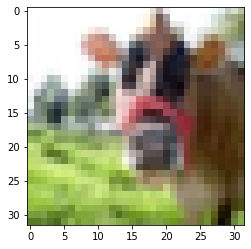

Epoch 1/10
20/20 [==============================] - 3s 126ms/step - loss: 4.6494 - accuracy: 0.0108 - val_loss: 4.6071 - val_accuracy: 0.0131
Epoch 2/10
20/20 [==============================] - 2s 113ms/step - loss: 4.6163 - accuracy: 0.0121 - val_loss: 4.6019 - val_accuracy: 0.0129
Epoch 3/10
20/20 [==============================] - 2s 111ms/step - loss: 4.6088 - accuracy: 0.0123 - val_loss: 4.5998 - val_accuracy: 0.0127
Epoch 4/10
20/20 [==============================] - 2s 112ms/step - loss: 4.6058 - accuracy: 0.0120 - val_loss: 4.5985 - val_accuracy: 0.0134
Epoch 5/10
20/20 [==============================] - 2s 114ms/step - loss: 4.6041 - accuracy: 0.0120 - val_loss: 4.5973 - val_accuracy: 0.0151
Epoch 6/10
20/20 [==============================] - 2s 112ms/step - loss: 4.6026 - accuracy: 0.0126 - val_loss: 4.5961 - val_accuracy: 0.0158
Epoch 7/10
20/20 [==============================] - 2s 112ms/step - loss: 4.6021 - accuracy: 0.0133 - val_loss: 4.5951 - val_accuracy: 0.0160
Epoch 

In [ ]:
x_train,y_train,x_test, y_test=dataset(2)
fig, ax = plt.subplots(1,1)

ax.imshow(x_train[0])
plt.show()
res=[]
 
# create header
head = ["hidden layer","hidden node","dropout","test loss","test accuracy"]
for drop in Drop_out:
  for hidden_node in hidden_nodes:
    model=model_temp(100,hidden_node,drop)
    model=model_compile(model,'SGD')
    model=train(model)
    result=test_pred(model)
    res.append([3,hidden_node,drop,result[0],result[1]])

In [ ]:
# display table
print(tabulate(res, headers=head, tablefmt="grid"))

+----------------+---------------+-----------+-------------+-----------------+
|   hidden layer |   hidden node |   dropout |   test loss |   test accuracy |
+================+===============+===========+=============+=================+
|              2 |           128 |       0.2 |     4.59371 |          0.0154 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           256 |       0.2 |     4.57721 |          0.0243 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           512 |       0.2 |     4.54887 |          0.0374 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           128 |       0.4 |     4.5977  |          0.0151 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           256 |       0.4 |     4.59684 |          0.0164 |
+----------------+---------------+-----------+------

# With regularization 
# hidden layer 4

In [ ]:
def dataset(data):
  if data==1:
    (x_train, y_train), (x_test, y_test) =tf.keras.datasets.cifar10.load_data() 
    y_train = y_train.flatten()
    y_test = y_test.flatten()
    y_train=tf.one_hot(y_train,10, on_value=None, off_value=None, axis=None, dtype=None, name=None)
    y_test=tf.one_hot(
        y_test,10, on_value=None, off_value=None, axis=None, dtype=None, name=None)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
      
    # normalize image pixel values by dividing 
    # by 255
    gray_scale = 255
    x_train /= gray_scale
    x_test /= gray_scale
  else:
    (x_train, y_train), (x_test, y_test) =tf.keras.datasets.cifar100.load_data(label_mode="fine") 
    y_train = y_train.flatten()
    y_test = y_test.flatten()
    y_train=tf.one_hot( y_train,100, on_value=None, off_value=None, axis=None, dtype=None, name=None)
    y_test=tf.one_hot(
        y_test,100, on_value=None, off_value=None, axis=None, dtype=None, name=None)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
      
    # normalize image pixel values by dividing 
    # by 255
    gray_scale = 255
    x_train /= gray_scale
    x_test /= gray_scale
  return x_train,y_train,x_test, y_test
def model_temp(label_dim,hidden_node,dropout):
  model = Sequential([
    
    # reshape 28 row * 28 column data to 28*28 rows
    Flatten(input_shape=(32, 32, 3)),
    
      # dense layer 1
    Dense(hidden_node, activation='relu'),  
    Dropout(dropout),
    # dense layer 2
    Dense(hidden_node, activation='relu'), 
    Dropout(dropout),
    Dense(hidden_node, activation='relu'), 
    Dropout(dropout),
    Dense(hidden_node, activation='relu'), 
    Dropout(dropout),
      # output layer
    Dense(label_dim, activation='softmax'),  
])
  return model
def model_compile(model,opt):
  model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model
def train(model):
  model.fit(x_train, y_train, epochs=10, 
          batch_size=2000, 
          validation_split=0.2)
  return model
def test_pred(model):
  results = model.evaluate(x_test,  y_test, verbose = 0)
  return results

In [ ]:
hidden_nodes=[128,256,512]
Drop_out=[0.2,0.4,0.6]

 Adam

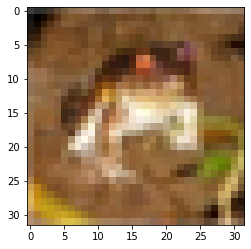

Epoch 1/10
20/20 [==============================] - 3s 129ms/step - loss: 2.2081 - accuracy: 0.1585 - val_loss: 2.0648 - val_accuracy: 0.2444
Epoch 2/10
20/20 [==============================] - 2s 116ms/step - loss: 2.0436 - accuracy: 0.2321 - val_loss: 1.9443 - val_accuracy: 0.2827
Epoch 3/10
20/20 [==============================] - 2s 115ms/step - loss: 1.9530 - accuracy: 0.2758 - val_loss: 1.8696 - val_accuracy: 0.3256
Epoch 4/10
20/20 [==============================] - 2s 115ms/step - loss: 1.8946 - accuracy: 0.3036 - val_loss: 1.8285 - val_accuracy: 0.3405
Epoch 5/10
20/20 [==============================] - 2s 116ms/step - loss: 1.8546 - accuracy: 0.3202 - val_loss: 1.7874 - val_accuracy: 0.3532
Epoch 6/10
20/20 [==============================] - 2s 116ms/step - loss: 1.8245 - accuracy: 0.3397 - val_loss: 1.7609 - val_accuracy: 0.3674
Epoch 7/10
20/20 [==============================] - 2s 114ms/step - loss: 1.8021 - accuracy: 0.3449 - val_loss: 1.7190 - val_accuracy: 0.3840
Epoch 

In [ ]:
x_train,y_train,x_test, y_test=dataset(1)
fig, ax = plt.subplots(1,1)

ax.imshow(x_train[0])
plt.show()
res=[]
 
# create header
head = ["hidden layer","hidden node","dropout","test loss","test accuracy"]
for drop in Drop_out:
  for hidden_node in hidden_nodes:
    model=model_temp(10,hidden_node,drop)
    model=model_compile(model,'Adam')
    model=train(model)
    result=test_pred(model)
    res.append([4,hidden_node,drop,result[0],result[1]])

In [ ]:
# display table
print(tabulate(res, headers=head, tablefmt="grid"))

+----------------+---------------+-----------+-------------+-----------------+
|   hidden layer |   hidden node |   dropout |   test loss |   test accuracy |
+================+===============+===========+=============+=================+
|              2 |           128 |       0.2 |     1.64488 |          0.4193 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           256 |       0.2 |     1.59725 |          0.4259 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           512 |       0.2 |     1.54812 |          0.444  |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           128 |       0.4 |     2.02603 |          0.2353 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           256 |       0.4 |     1.85956 |          0.3342 |
+----------------+---------------+-----------+------

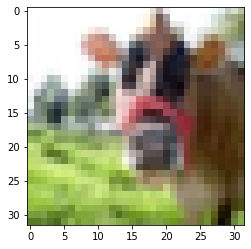

Epoch 1/10
20/20 [==============================] - 3s 133ms/step - loss: 4.6086 - accuracy: 0.0109 - val_loss: 4.5865 - val_accuracy: 0.0220
Epoch 2/10
20/20 [==============================] - 2s 120ms/step - loss: 4.5491 - accuracy: 0.0194 - val_loss: 4.4541 - val_accuracy: 0.0379
Epoch 3/10
20/20 [==============================] - 2s 120ms/step - loss: 4.4077 - accuracy: 0.0343 - val_loss: 4.2637 - val_accuracy: 0.0525
Epoch 4/10
20/20 [==============================] - 2s 119ms/step - loss: 4.2777 - accuracy: 0.0461 - val_loss: 4.1280 - val_accuracy: 0.0581
Epoch 5/10
20/20 [==============================] - 2s 119ms/step - loss: 4.1965 - accuracy: 0.0503 - val_loss: 4.0683 - val_accuracy: 0.0681
Epoch 6/10
20/20 [==============================] - 2s 121ms/step - loss: 4.1415 - accuracy: 0.0542 - val_loss: 4.0318 - val_accuracy: 0.0766
Epoch 7/10
20/20 [==============================] - 2s 120ms/step - loss: 4.1060 - accuracy: 0.0605 - val_loss: 3.9963 - val_accuracy: 0.0808
Epoch 

In [ ]:
x_train,y_train,x_test, y_test=dataset(2)
fig, ax = plt.subplots(1,1)

ax.imshow(x_train[0])
plt.show()
res=[]
 
# create header
head = ["hidden layer","hidden node","dropout","test loss","test accuracy"]
for drop in Drop_out:
  for hidden_node in hidden_nodes:
    model=model_temp(100,hidden_node,drop)
    model=model_compile(model,'Adam')
    model=train(model)
    result=test_pred(model)
    res.append([4,hidden_node,drop,result[0],result[1]])

In [ ]:
# display table
print(tabulate(res, headers=head, tablefmt="grid"))

+----------------+---------------+-----------+-------------+-----------------+
|   hidden layer |   hidden node |   dropout |   test loss |   test accuracy |
+================+===============+===========+=============+=================+
|              2 |           128 |       0.2 |     3.8851  |          0.1068 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           256 |       0.2 |     3.72056 |          0.1336 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           512 |       0.2 |     3.52213 |          0.1737 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           128 |       0.4 |     4.45526 |          0.0321 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           256 |       0.4 |     4.29489 |          0.0474 |
+----------------+---------------+-----------+------

 SGD

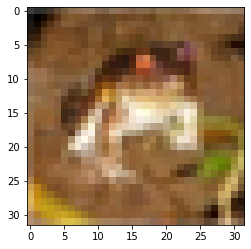

Epoch 1/10
20/20 [==============================] - 3s 126ms/step - loss: 2.3315 - accuracy: 0.0993 - val_loss: 2.2987 - val_accuracy: 0.1254
Epoch 2/10
20/20 [==============================] - 2s 115ms/step - loss: 2.3066 - accuracy: 0.1084 - val_loss: 2.2889 - val_accuracy: 0.1415
Epoch 3/10
20/20 [==============================] - 2s 115ms/step - loss: 2.2971 - accuracy: 0.1173 - val_loss: 2.2818 - val_accuracy: 0.1541
Epoch 4/10
20/20 [==============================] - 2s 114ms/step - loss: 2.2916 - accuracy: 0.1260 - val_loss: 2.2749 - val_accuracy: 0.1727
Epoch 5/10
20/20 [==============================] - 2s 115ms/step - loss: 2.2855 - accuracy: 0.1315 - val_loss: 2.2671 - val_accuracy: 0.1873
Epoch 6/10
20/20 [==============================] - 2s 114ms/step - loss: 2.2814 - accuracy: 0.1355 - val_loss: 2.2598 - val_accuracy: 0.1943
Epoch 7/10
20/20 [==============================] - 2s 113ms/step - loss: 2.2714 - accuracy: 0.1467 - val_loss: 2.2502 - val_accuracy: 0.1993
Epoch 

In [ ]:
x_train,y_train,x_test, y_test=dataset(1)
fig, ax = plt.subplots(1,1)

ax.imshow(x_train[0])
plt.show()
res=[]
 
# create header
head = ["hidden layer","hidden node","dropout","test loss","test accuracy"]
for drop in Drop_out:
  for hidden_node in hidden_nodes:
    model=model_temp(10,hidden_node,drop)
    model=model_compile(model,'SGD')
    model=train(model)
    result=test_pred(model)
    res.append([4,hidden_node,drop,result[0],result[1]])

In [ ]:
# display table
print(tabulate(res, headers=head, tablefmt="grid"))

+----------------+---------------+-----------+-------------+-----------------+
|   hidden layer |   hidden node |   dropout |   test loss |   test accuracy |
+================+===============+===========+=============+=================+
|              2 |           128 |       0.2 |     2.21436 |          0.2111 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           256 |       0.2 |     2.11147 |          0.2451 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           512 |       0.2 |     2.08307 |          0.2677 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           128 |       0.4 |     2.28539 |          0.1817 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           256 |       0.4 |     2.26384 |          0.2237 |
+----------------+---------------+-----------+------

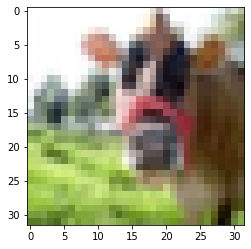

Epoch 1/10
20/20 [==============================] - 3s 131ms/step - loss: 4.6351 - accuracy: 0.0091 - val_loss: 4.6101 - val_accuracy: 0.0117
Epoch 2/10
20/20 [==============================] - 2s 119ms/step - loss: 4.6196 - accuracy: 0.0099 - val_loss: 4.6067 - val_accuracy: 0.0110
Epoch 3/10
20/20 [==============================] - 2s 119ms/step - loss: 4.6119 - accuracy: 0.0097 - val_loss: 4.6051 - val_accuracy: 0.0111
Epoch 4/10
20/20 [==============================] - 2s 119ms/step - loss: 4.6100 - accuracy: 0.0099 - val_loss: 4.6037 - val_accuracy: 0.0124
Epoch 5/10
20/20 [==============================] - 2s 118ms/step - loss: 4.6080 - accuracy: 0.0111 - val_loss: 4.6028 - val_accuracy: 0.0125
Epoch 6/10
20/20 [==============================] - 2s 118ms/step - loss: 4.6072 - accuracy: 0.0112 - val_loss: 4.6023 - val_accuracy: 0.0133
Epoch 7/10
20/20 [==============================] - 2s 118ms/step - loss: 4.6060 - accuracy: 0.0110 - val_loss: 4.6018 - val_accuracy: 0.0134
Epoch 

In [ ]:
x_train,y_train,x_test, y_test=dataset(2)
fig, ax = plt.subplots(1,1)

ax.imshow(x_train[0])
plt.show()
res=[]
 
# create header
head = ["hidden layer","hidden node","dropout","test loss","test accuracy"]
for drop in Drop_out:
  for hidden_node in hidden_nodes:
    model=model_temp(100,hidden_node,drop)
    model=model_compile(model,'SGD')
    model=train(model)
    result=test_pred(model)
    res.append([4,hidden_node,drop,result[0],result[1]])

In [ ]:
# display table
print(tabulate(res, headers=head, tablefmt="grid"))

+----------------+---------------+-----------+-------------+-----------------+
|   hidden layer |   hidden node |   dropout |   test loss |   test accuracy |
+================+===============+===========+=============+=================+
|              2 |           128 |       0.2 |     4.60005 |          0.0125 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           256 |       0.2 |     4.59586 |          0.0153 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           512 |       0.2 |     4.57846 |          0.0267 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           128 |       0.4 |     4.6037  |          0.0142 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           256 |       0.4 |     4.60147 |          0.0144 |
+----------------+---------------+-----------+------

# With regularization 
# hidden layer 5

In [ ]:
def dataset(data):
  if data==1:
    (x_train, y_train), (x_test, y_test) =tf.keras.datasets.cifar10.load_data() 
    y_train = y_train.flatten()
    y_test = y_test.flatten()
    y_train=tf.one_hot(y_train,10, on_value=None, off_value=None, axis=None, dtype=None, name=None)
    y_test=tf.one_hot(
        y_test,10, on_value=None, off_value=None, axis=None, dtype=None, name=None)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
      
    # normalize image pixel values by dividing 
    # by 255
    gray_scale = 255
    x_train /= gray_scale
    x_test /= gray_scale
  else:
    (x_train, y_train), (x_test, y_test) =tf.keras.datasets.cifar100.load_data(label_mode="fine") 
    y_train = y_train.flatten()
    y_test = y_test.flatten()
    y_train=tf.one_hot( y_train,100, on_value=None, off_value=None, axis=None, dtype=None, name=None)
    y_test=tf.one_hot(
        y_test,100, on_value=None, off_value=None, axis=None, dtype=None, name=None)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
      
    # normalize image pixel values by dividing 
    # by 255
    gray_scale = 255
    x_train /= gray_scale
    x_test /= gray_scale
  return x_train,y_train,x_test, y_test
def model_temp(label_dim,hidden_node,dropout):
  model = Sequential([
    
    # reshape 28 row * 28 column data to 28*28 rows
    Flatten(input_shape=(32, 32, 3)),
    
      # dense layer 1
    Dense(hidden_node, activation='relu'),  
    Dropout(dropout),
    # dense layer 2
    Dense(hidden_node, activation='relu'), 
    Dropout(dropout),
    Dense(hidden_node, activation='relu'), 
    Dropout(dropout),
    Dense(hidden_node, activation='relu'), 
    Dropout(dropout),
    Dense(hidden_node, activation='relu'), 
    Dropout(dropout),
      # output layer
    Dense(label_dim, activation='softmax'),  
])
  return model
def model_compile(model,opt):
  model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model
def train(model):
  model.fit(x_train, y_train, epochs=10, 
          batch_size=2000, 
          validation_split=0.2)
  return model
def test_pred(model):
  results = model.evaluate(x_test,  y_test, verbose = 0)
  return results

In [ ]:
hidden_nodes=[128,256,512]
Drop_out=[0.2,0.4,0.6]

 Adam

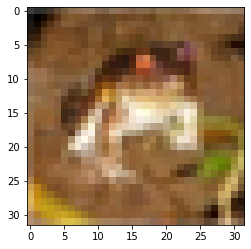

Epoch 1/10
20/20 [==============================] - 3s 130ms/step - loss: 2.2682 - accuracy: 0.1350 - val_loss: 2.1414 - val_accuracy: 0.2147
Epoch 2/10
20/20 [==============================] - 2s 118ms/step - loss: 2.1045 - accuracy: 0.2034 - val_loss: 2.0004 - val_accuracy: 0.2585
Epoch 3/10
20/20 [==============================] - 2s 117ms/step - loss: 2.0181 - accuracy: 0.2407 - val_loss: 1.9500 - val_accuracy: 0.2803
Epoch 4/10
20/20 [==============================] - 2s 116ms/step - loss: 1.9695 - accuracy: 0.2625 - val_loss: 1.8959 - val_accuracy: 0.3108
Epoch 5/10
20/20 [==============================] - 2s 118ms/step - loss: 1.9241 - accuracy: 0.2871 - val_loss: 1.8627 - val_accuracy: 0.3253
Epoch 6/10
20/20 [==============================] - 2s 117ms/step - loss: 1.8910 - accuracy: 0.3070 - val_loss: 1.8249 - val_accuracy: 0.3421
Epoch 7/10
20/20 [==============================] - 2s 119ms/step - loss: 1.8625 - accuracy: 0.3144 - val_loss: 1.7918 - val_accuracy: 0.3534
Epoch 

In [ ]:
x_train,y_train,x_test, y_test=dataset(1)
fig, ax = plt.subplots(1,1)

ax.imshow(x_train[0])
plt.show()
res=[]
 
# create header
head = ["hidden layer","hidden node","dropout","test loss","test accuracy"]
for drop in Drop_out:
  for hidden_node in hidden_nodes:
    model=model_temp(10,hidden_node,drop)
    model=model_compile(model,'Adam')
    model=train(model)
    result=test_pred(model)
    res.append([5,hidden_node,drop,result[0],result[1]])

In [ ]:
# display table
print(tabulate(res, headers=head, tablefmt="grid"))

+----------------+---------------+-----------+-------------+-----------------+
|   hidden layer |   hidden node |   dropout |   test loss |   test accuracy |
+================+===============+===========+=============+=================+
|              2 |           128 |       0.2 |     1.71191 |          0.3832 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           256 |       0.2 |     1.59511 |          0.4292 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           512 |       0.2 |     1.55869 |          0.4468 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           128 |       0.4 |     2.12994 |          0.1982 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           256 |       0.4 |     2.00667 |          0.2427 |
+----------------+---------------+-----------+------

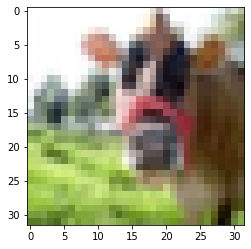

Epoch 1/10
20/20 [==============================] - 3s 137ms/step - loss: 4.6121 - accuracy: 0.0103 - val_loss: 4.6023 - val_accuracy: 0.0123
Epoch 2/10
20/20 [==============================] - 2s 125ms/step - loss: 4.5979 - accuracy: 0.0114 - val_loss: 4.5797 - val_accuracy: 0.0193
Epoch 3/10
20/20 [==============================] - 2s 125ms/step - loss: 4.5432 - accuracy: 0.0170 - val_loss: 4.4670 - val_accuracy: 0.0190
Epoch 4/10
20/20 [==============================] - 2s 123ms/step - loss: 4.4406 - accuracy: 0.0246 - val_loss: 4.3478 - val_accuracy: 0.0356
Epoch 5/10
20/20 [==============================] - 2s 124ms/step - loss: 4.3552 - accuracy: 0.0288 - val_loss: 4.2630 - val_accuracy: 0.0424
Epoch 6/10
20/20 [==============================] - 2s 123ms/step - loss: 4.2983 - accuracy: 0.0350 - val_loss: 4.2443 - val_accuracy: 0.0539
Epoch 7/10
20/20 [==============================] - 2s 122ms/step - loss: 4.2580 - accuracy: 0.0390 - val_loss: 4.1948 - val_accuracy: 0.0583
Epoch 

In [ ]:
x_train,y_train,x_test, y_test=dataset(2)
fig, ax = plt.subplots(1,1)

ax.imshow(x_train[0])
plt.show()
res=[]
 
# create header
head = ["hidden layer","hidden node","dropout","test loss","test accuracy"]
for drop in Drop_out:
  for hidden_node in hidden_nodes:
    model=model_temp(100,hidden_node,drop)
    model=model_compile(model,'Adam')
    model=train(model)
    result=test_pred(model)
    res.append([5,hidden_node,drop,result[0],result[1]])

In [ ]:
# display table
print(tabulate(res, headers=head, tablefmt="grid"))

+----------------+---------------+-----------+-------------+-----------------+
|   hidden layer |   hidden node |   dropout |   test loss |   test accuracy |
+================+===============+===========+=============+=================+
|              2 |           128 |       0.2 |     4.04342 |          0.0753 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           256 |       0.2 |     3.81705 |          0.1118 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           512 |       0.2 |     3.61464 |          0.1548 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           128 |       0.4 |     4.498   |          0.0204 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           256 |       0.4 |     4.30644 |          0.0431 |
+----------------+---------------+-----------+------

 SGD

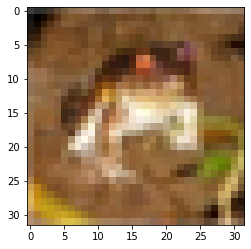

Epoch 1/10
20/20 [==============================] - 3s 134ms/step - loss: 2.3224 - accuracy: 0.1017 - val_loss: 2.2973 - val_accuracy: 0.1221
Epoch 2/10
20/20 [==============================] - 2s 120ms/step - loss: 2.3077 - accuracy: 0.1086 - val_loss: 2.2921 - val_accuracy: 0.1458
Epoch 3/10
20/20 [==============================] - 2s 119ms/step - loss: 2.3010 - accuracy: 0.1136 - val_loss: 2.2879 - val_accuracy: 0.1625
Epoch 4/10
20/20 [==============================] - 2s 119ms/step - loss: 2.2989 - accuracy: 0.1179 - val_loss: 2.2842 - val_accuracy: 0.1723
Epoch 5/10
20/20 [==============================] - 2s 120ms/step - loss: 2.2938 - accuracy: 0.1233 - val_loss: 2.2798 - val_accuracy: 0.1812
Epoch 6/10
20/20 [==============================] - 2s 121ms/step - loss: 2.2905 - accuracy: 0.1259 - val_loss: 2.2751 - val_accuracy: 0.1906
Epoch 7/10
20/20 [==============================] - 2s 122ms/step - loss: 2.2877 - accuracy: 0.1293 - val_loss: 2.2699 - val_accuracy: 0.2021
Epoch 

In [ ]:
x_train,y_train,x_test, y_test=dataset(1)
fig, ax = plt.subplots(1,1)

ax.imshow(x_train[0])
plt.show()
res=[]
 
# create header
head = ["hidden layer","hidden node","dropout","test loss","test accuracy"]
for drop in Drop_out:
  for hidden_node in hidden_nodes:
    model=model_temp(10,hidden_node,drop)
    model=model_compile(model,'SGD')
    model=train(model)
    result=test_pred(model)
    res.append([5,hidden_node,drop,result[0],result[1]])

In [ ]:
# display table
print(tabulate(res, headers=head, tablefmt="grid"))

+----------------+---------------+-----------+-------------+-----------------+
|   hidden layer |   hidden node |   dropout |   test loss |   test accuracy |
+================+===============+===========+=============+=================+
|              2 |           128 |       0.2 |     2.24866 |          0.2124 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           256 |       0.2 |     2.2082  |          0.1998 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           512 |       0.2 |     2.12401 |          0.2292 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           128 |       0.4 |     2.2864  |          0.147  |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           256 |       0.4 |     2.28898 |          0.2047 |
+----------------+---------------+-----------+------

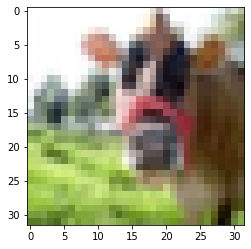

Epoch 1/10
20/20 [==============================] - 3s 136ms/step - loss: 4.6313 - accuracy: 0.0098 - val_loss: 4.6084 - val_accuracy: 0.0086
Epoch 2/10
20/20 [==============================] - 2s 122ms/step - loss: 4.6189 - accuracy: 0.0092 - val_loss: 4.6060 - val_accuracy: 0.0072
Epoch 3/10
20/20 [==============================] - 2s 124ms/step - loss: 4.6126 - accuracy: 0.0104 - val_loss: 4.6049 - val_accuracy: 0.0077
Epoch 4/10
20/20 [==============================] - 2s 122ms/step - loss: 4.6107 - accuracy: 0.0105 - val_loss: 4.6044 - val_accuracy: 0.0082
Epoch 5/10
20/20 [==============================] - 2s 122ms/step - loss: 4.6086 - accuracy: 0.0101 - val_loss: 4.6039 - val_accuracy: 0.0102
Epoch 6/10
20/20 [==============================] - 2s 121ms/step - loss: 4.6083 - accuracy: 0.0102 - val_loss: 4.6036 - val_accuracy: 0.0105
Epoch 7/10
20/20 [==============================] - 2s 123ms/step - loss: 4.6073 - accuracy: 0.0099 - val_loss: 4.6032 - val_accuracy: 0.0107
Epoch 

In [ ]:
x_train,y_train,x_test, y_test=dataset(2)
fig, ax = plt.subplots(1,1)

ax.imshow(x_train[0])
plt.show()
res=[]
 
# create header
head = ["hidden layer","hidden node","dropout","test loss","test accuracy"]
for drop in Drop_out:
  for hidden_node in hidden_nodes:
    model=model_temp(100,hidden_node,drop)
    model=model_compile(model,'SGD')
    model=train(model)
    result=test_pred(model)
    res.append([5,hidden_node,drop,result[0],result[1]])

In [ ]:
# display table
print(tabulate(res, headers=head, tablefmt="grid"))

+----------------+---------------+-----------+-------------+-----------------+
|   hidden layer |   hidden node |   dropout |   test loss |   test accuracy |
+================+===============+===========+=============+=================+
|              2 |           128 |       0.2 |     4.60212 |          0.0121 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           256 |       0.2 |     4.60134 |          0.0097 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           512 |       0.2 |     4.59445 |          0.0134 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           128 |       0.4 |     4.60454 |          0.0102 |
+----------------+---------------+-----------+-------------+-----------------+
|              2 |           256 |       0.4 |     4.60401 |          0.012  |
+----------------+---------------+-----------+------